# scgpgmm GMMGP
This actually works currently
https://pyro.ai/examples/scgpgmm.html
https://docs.scvi-tools.org/en/stable/user_guide/models/scgpgmm.html

In [1]:
# various import statements
import numpy as np
import torch
import torch.nn as nn
from torch.nn.functional import softplus, softmax
from torch.distributions import constraints
from torch.optim import Adam
import seaborn
import pyro
import pyro.distributions as dist
import pyro.poutine as poutine
from pyro.distributions.util import broadcast_shape
from pyro.optim import MultiStepLR
from pyro.infer import SVI, config_enumerate, TraceEnum_ELBO
from pyro.ops.indexing import Vindex
import pyro.contrib
import tqdm
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
foo='hello'
bar='world'
import os
import sklearn
from sklearn import cluster
import pandas as pd
import re
import scanpy as sc
print(f"{foo=} {bar=}")
from torch import exp
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://notification-sounds.com/soundsfiles/Meditation-bell-sound.mp3', autoplay=True))
sc.settings.figdir=os.path.expanduser('~/WbFigures/SpeciesDivergenceNoScaling')
    
smoke_test=False
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


foo='hello' bar='world'
cuda:0


In [2]:
"""
hdata=sc.read('/home/mtschmitz/AllenMOp/Human_mOP.h5ad')
hdata.obs.index=hdata.obs.iloc[:,0]
hdata.var.index=hdata.var.iloc[:,0]
hdata.obs['species']='human'
hdata.var_names_make_unique()
hdata.obs_names_make_unique()

qdata=sc.read('/home/mtschmitz/AllenMOp/Macaque_mOP.h5ad')
qdata.obs.index=qdata.obs.iloc[:,0]
qdata.var.index=qdata.var.iloc[:,0]
qdata.obs['species']='macaque'
qdata.var_names_make_unique()
qdata.obs_names_make_unique()

rdata=sc.read('/home/mtschmitz/AllenMOp/Marmoset_mOP.h5ad')
rdata.obs.index=rdata.obs.iloc[:,0]
rdata.var.index=rdata.var.iloc[:,0]
rdata.obs['species']='marmoset'
rdata.var_names_make_unique()
rdata.obs_names_make_unique()

mdata=sc.read('/home/mtschmitz/AllenMOp/Mouse_mOP.h5ad')
mdata.obs.index=mdata.obs.iloc[:,0]
mdata.var.index=mdata.var.iloc[:,0]
mdata.obs['species']='mouse'

orthos=pd.read_csv('/home/mtschmitz/utils/HOM_AllOrganism.rpt',sep='\t')
orthos=orthos.loc[orthos['NCBI Taxon ID'].isin([10090,9606]),:]
classcounts=orthos['DB Class Key'].value_counts()
one2one=classcounts.index[list(classcounts==2)]
orthos=orthos.loc[orthos['DB Class Key'].isin(one2one),:]

htab=orthos.loc[orthos['NCBI Taxon ID']==9606,:]
mtab=orthos.loc[orthos['NCBI Taxon ID']==10090,:]
genemapping=dict(zip([x.upper() for x in mtab['Symbol']],htab['Symbol']))
mdata.var.index=[x.upper() for x in mdata.var.index]
mdata=mdata[:,mdata.var.index.isin(genemapping.keys())]
mdata.var.index=[genemapping[x] for x in mdata.var.index]
mdata.var_names_make_unique()
mdata.obs_names_make_unique()

mdata.obs['batch_name']=mdata.obs.index.str.replace('_[A-Z0-9\-]*$','')
rdata.obs['batch_name']=rdata.obs.index.str.replace('_[A-Z0-9\-]*$','')
hdata.obs['batch_name']=hdata.obs.index.str.replace('^[A-Z0-9\-]*_','')
qdata.obs['batch_name']=qdata.obs.index.str.replace('^[A-Z0-9\-]*_','')

adata=sc.concat([hdata,mdata,rdata,qdata])
del hdata
del qdata
del mdata
del rdata
adata.raw=adata
adata.layers['spliced']=adata.X

adata.obs['species']=adata.obs['species'].astype('category')
adata.obs['batch_name']=adata.obs['batch_name'].astype('category')
adata.uns['batch_cats']=dict(zip([str(x) for x in adata.obs['batch_name'].cat.categories],[str(x) for x in sorted(set(adata.obs['batch_name'].cat.codes))]))
sc.pp.highly_variable_genes(adata,n_top_genes=14000,flavor="seurat_v3",subset=False)
adata.obs['sample_region']=adata.obs['species']

adata.var['highly_variable']=adata.var['highly_variable_rank']<5000
sc.pp.filter_genes(adata,min_cells=10)
sc.pp.normalize_total(adata,exclude_highly_expressed=True)
sc.pp.log1p(adata)
sc.pp.scale(adata,max_value=10)
sc.pp.pca(adata,n_comps=50)
sc.pp.neighbors(adata,n_neighbors=20, use_rep="X_pca")
sc.tl.leiden(adata,resolution=1.5)#.8 works for cross species when not marker subsetted
sc.tl.umap(adata)
adata.obsm["X_original_umap"]=adata.obsm["X_umap"]
adata.write('/home/mtschmitz/AllenMOp/Merged_mOP.h5ad')
"""

'\nhdata=sc.read(\'/home/mtschmitz/AllenMOp/Human_mOP.h5ad\')\nhdata.obs.index=hdata.obs.iloc[:,0]\nhdata.var.index=hdata.var.iloc[:,0]\nhdata.obs[\'species\']=\'human\'\nhdata.var_names_make_unique()\nhdata.obs_names_make_unique()\n\nqdata=sc.read(\'/home/mtschmitz/AllenMOp/Macaque_mOP.h5ad\')\nqdata.obs.index=qdata.obs.iloc[:,0]\nqdata.var.index=qdata.var.iloc[:,0]\nqdata.obs[\'species\']=\'macaque\'\nqdata.var_names_make_unique()\nqdata.obs_names_make_unique()\n\nrdata=sc.read(\'/home/mtschmitz/AllenMOp/Marmoset_mOP.h5ad\')\nrdata.obs.index=rdata.obs.iloc[:,0]\nrdata.var.index=rdata.var.iloc[:,0]\nrdata.obs[\'species\']=\'marmoset\'\nrdata.var_names_make_unique()\nrdata.obs_names_make_unique()\n\nmdata=sc.read(\'/home/mtschmitz/AllenMOp/Mouse_mOP.h5ad\')\nmdata.obs.index=mdata.obs.iloc[:,0]\nmdata.var.index=mdata.var.iloc[:,0]\nmdata.obs[\'species\']=\'mouse\'\n\northos=pd.read_csv(\'/home/mtschmitz/utils/HOM_AllOrganism.rpt\',sep=\'\t\')\northos=orthos.loc[orthos[\'NCBI Taxon ID\']

In [ ]:
adata=sc.read('/home/mtschmitz/AllenMOp/Merged_mOP.h5ad')
adata=adata[:,adata.var['highly_variable_rank']<12000]
adata.obsm["X_original_umap"]=adata.obsm["X_umap"]
sc.pl.umap(adata,color=['leiden'])
sc.pl.umap(adata,color=['species'])
sc.pl.umap(adata,color=['batch_name'])

In [ ]:
adata

<AxesSubplot:>

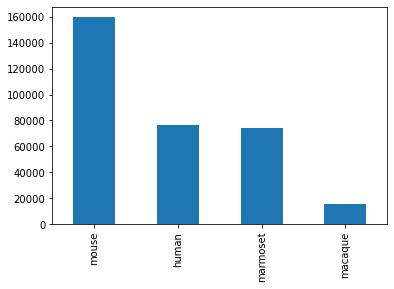

In [4]:
adata.obs['sample_region'].value_counts().plot.bar()

In [5]:
batch_values=torch.nn.functional.one_hot(torch.tensor(adata.obs['batch_name'].cat.codes).long(),num_classes=len(adata.obs['batch_name'].cat.categories)).float()
adata.obs['batch_name']

adata.Dimnames..2..
AAACCCAAGGATTTCC-21L8TX_180927_001_A01    180927_001_A01
AAACCCAAGTATGGCG-21L8TX_180927_001_A01    180927_001_A01
AAACCCACAAAGTGTA-21L8TX_180927_001_A01    180927_001_A01
AAACCCACACTACTTT-21L8TX_180927_001_A01    180927_001_A01
AAACCCACAGTGAGCA-21L8TX_180927_001_A01    180927_001_A01
                                               ...      
TTTGTTGCATCATTTC-3L8TX_190903_01_A02       190903_01_A02
TTTGTTGCATGGCACC-3L8TX_190903_01_A02       190903_01_A02
TTTGTTGGTATCTCTT-3L8TX_190903_01_A02       190903_01_A02
TTTGTTGTCCTAAACG-3L8TX_190903_01_A02       190903_01_A02
TTTGTTGTCTTGGAAC-3L8TX_190903_01_A02       190903_01_A02
Name: batch_name, Length: 326316, dtype: category
Categories (59, object): ['180927_001_A01', '180927_001_B01', '180927_001_C01', '180927_001_D01', ..., 'pBICCNsMMrMOpRPiM003d190318', 'pBICCNsMMrMOpRPiM004d190318', 'pBICCNsMMrMOpRPiM007d190320', 'pBICCNsMMrMOpRPiM008d190320']

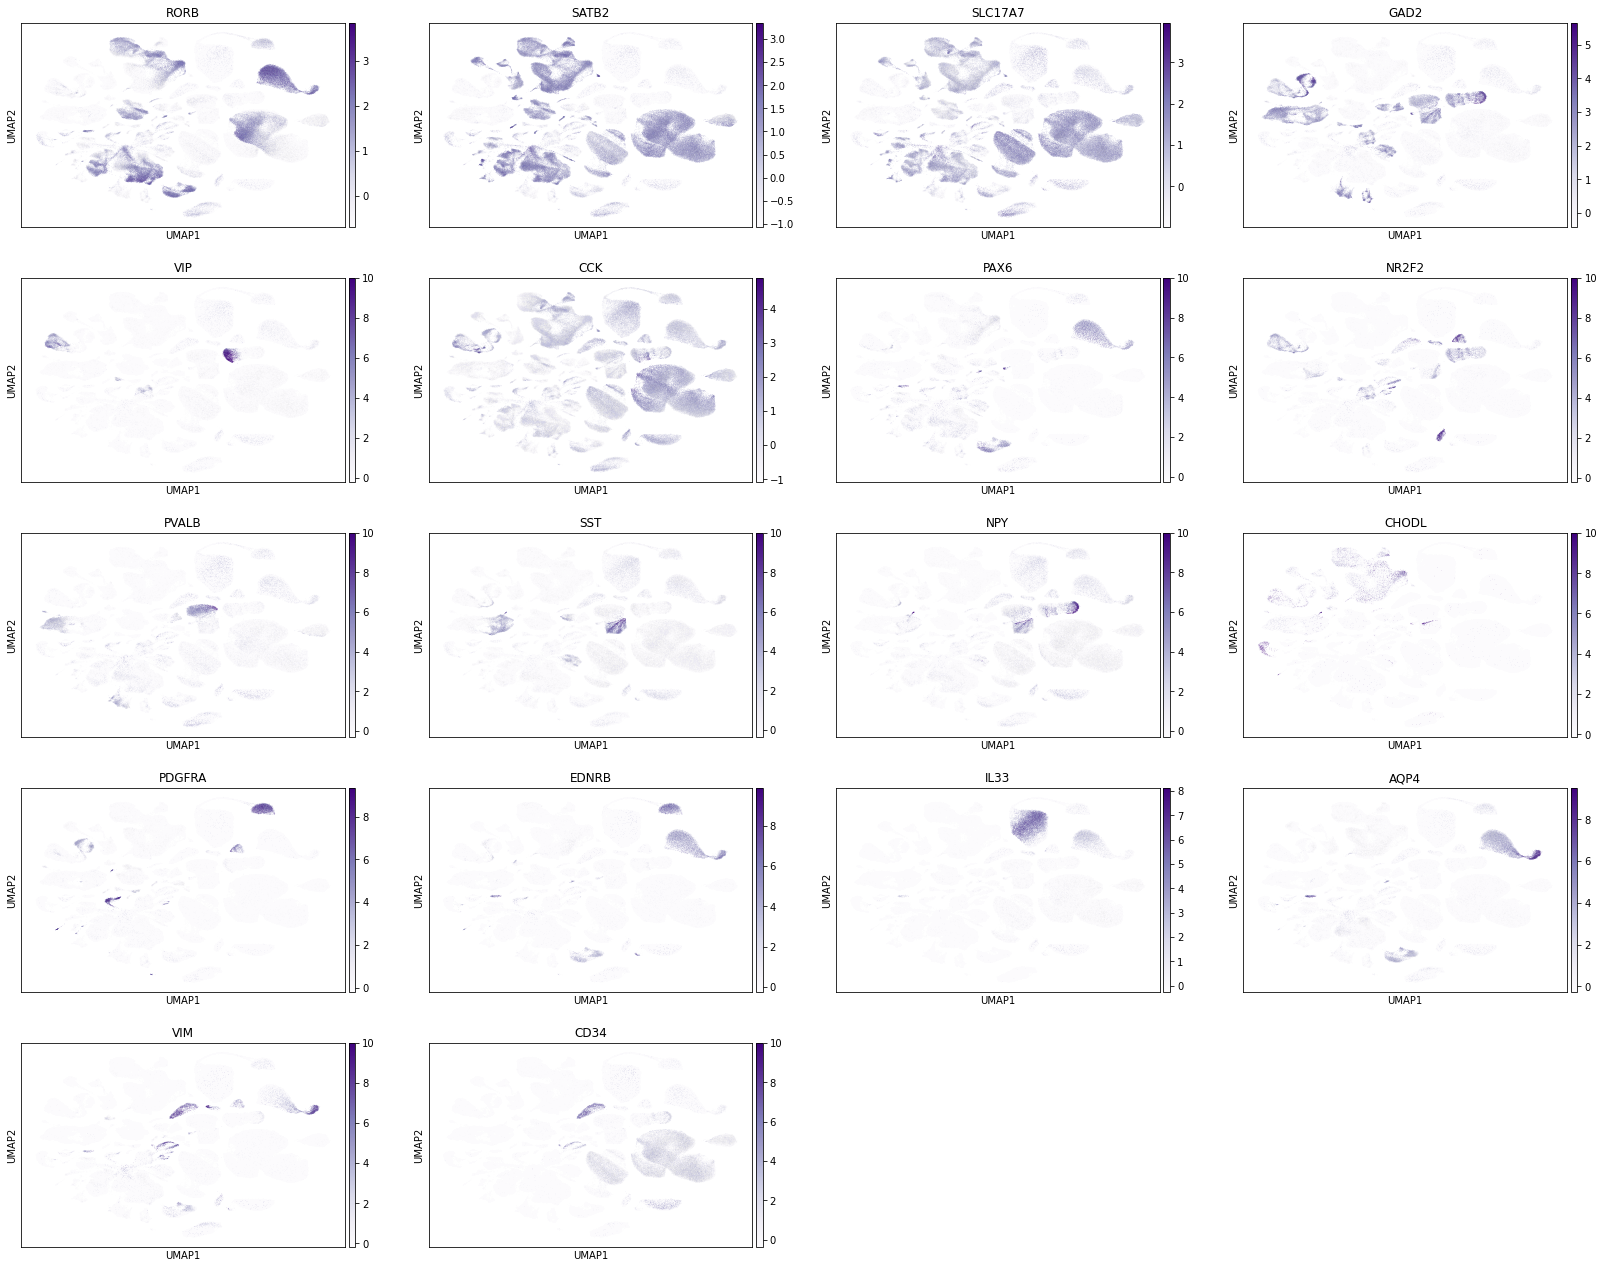

In [6]:
sc.pl.umap(adata,color=['RORB','SATB2','SLC17A7','GAD2','VIP','CCK','PAX6','NR2F2','PVALB','SST','NPY','CHODL','PDGFRA','EDNRB','IL33','AQP4','VIM','CD34'],use_raw=False,cmap='Purples')

In [7]:
#simple dataloader
#pip install -e git+https://github.com/ncullen93/torchsample.git#egg=torchsampl
def csr_to_sparsetensor(x):
    coo=x.tocoo()
    return(torch.sparse.LongTensor(torch.LongTensor([coo.row.tolist(), coo.col.tolist()]),
                              torch.Tensor(coo.data.astype(np.float64))))

batch_size=32
#adata.obs['species']=adata.obs['species'].astype('category')
species_arg=adata.obs['species'].cat.codes
species_values=torch.nn.functional.one_hot(torch.tensor(adata.obs['species'].cat.codes).long(),num_classes=len(adata.obs['species'].cat.categories)).float()

#adata.obs['batch_name']=adata.obs['batch_name'].astype('category')
batch_arg=adata.obs['batch_name'].replace(adata.uns['batch_cats']).astype(int)
batch_values=torch.nn.functional.one_hot(torch.tensor(adata.obs['batch_name'].replace(adata.uns['batch_cats']).astype(int)).long(),
                                         num_classes=len(adata.uns['batch_cats'].keys())).float()

adata.obs['region_species']=adata.obs['sample_region'].astype(str)+'_'+adata.obs['species'].astype(str)
class_weights = adata.obs['region_species'].astype('category').cat.codes.value_counts(normalize=False,sort=False).sort_index()
labels = adata.obs['region_species'].astype('category').cat.codes #corresponding labels of samples
weights = [1/class_weights[labels[i]] for i in range(len(labels))]
sampler = torch.utils.data.sampler.WeightedRandomSampler(torch.DoubleTensor(weights),len(weights),replacement=True)

d=torch.utils.data.TensorDataset(torch.tensor(adata.layers['spliced'].todense()),species_values,batch_values)
#d=torch.utils.data.TensorDataset(csr_to_sparsetensor(adata.layers['spliced']),csr_to_sparsetensor(adata.layers['unspliced']),species_values,batch_values)

dataloader = torch.utils.data.DataLoader(d,sampler=sampler, batch_size=batch_size,drop_last=True)#,batch_sampler=sampler)

data_batch = next(iter(dataloader))
print(data_batch)
print(data_batch[0].min(),data_batch[0].max())
print(data_batch[0].dtype)


[tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 1., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 2., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0.,

In [8]:
x=next(iter(dataloader))
print(x[0].min(),x[0].max())
x[0].shape

tensor(0.) tensor(404.)


torch.Size([32, 5000])

https://en.wikipedia.org/wiki/Logit-normal_distribution Logit normal approximation to Dirichlet

In [9]:
import pandas as pd
div_markers={'G0':[],#'YWHAG','NNAT','RBFOX3'
             'G1':['CCND1','CCND2','CCND3','CCNE1','CCNE2','MKI67','PCNA', 'CDK1','HMGB2','FBXO5','RRM2'],
'G1S':['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6', 'CDCA7',
      'DTL', 'PRIM1', 'UHRF1', 'MLF1IP', 'HELLS', 'RFC2', 'RPA2', 'RAD51AP1', 'GMNN', 
      'WDR76', 'SLBP', 'UBR7', 'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 
      'CDC6', 'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 
      'E2F8','H4C3','H1-3','H1-5','H2AC12','H2AC20','H1-2','H1-4','H1-1','FBXO5',
      'SPC25','FAM83D','HIST1H1A','HIST1H1B','HIST1H1C','HIST1H1D','HIST1H1E','CCND1','CCND2','CCND3','HMGB2'],#,'CCNE1', 'CCNE2'
'G2M':['HMGB2', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2', 'NUF2', 
       'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'FAM64A', 'SMC4', 'CCNB2', 'CKAP2L', 'CKAP2', 
       'AURKB', 'BUB1', 'KIF11', 'ANP32E', 'TUBB4B', 'GTSE1', 'KIF20B', 'HJURP', 'CDCA3', 'HN1', 
       'CDC20', 'TTK', 'CDC25C', 'KIF2C', 'NCAPD2', 'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2', 
       'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE', 'CTCF', 'NEK2', 'G2E3', 
       'GAS2L3', 'CBX5','ASPM','CENPA','CCND1','CCND2','CCND3','CCNA1','FBXO5']
        }


In [10]:

'''
adata.X=adata.raw.X[:,adata.raw.var.index.isin(adata.var.index)]
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata,max_value=10)
plot_keys=[]
for k in div_markers.keys():
    if len(div_markers[k])>0:
        plot_keys.append(k)
        sc.tl.score_genes(adata,gene_list=div_markers[k],score_name=k,use_raw=False)
#sc.pl.umap(adata,color=['CCND1','CCND2','CCND3','CCNE1','CCNE2','MKI67','PCNA'],use_raw=False)
#sc.pl.umap(adata,color=['HIST1H1A','HIST1H1B','HIST1H1C','HIST1H1D','HIST1H1E'],use_raw=False)
for k in plot_keys:
    sc.pl.umap(adata,color=k,use_raw=False)

for k in div_markers.keys():
    if len(div_markers[k])>0:
        print(k)
        sc.pl.umap(adata,color=[g for g in div_markers[k] if g in adata.var.index],use_raw=False,cmap='Purples')

adata.X=adata.raw.X[:,adata.raw.var.index.isin(adata.var.index)]
'''

"\nadata.X=adata.raw.X[:,adata.raw.var.index.isin(adata.var.index)]\nsc.pp.normalize_per_cell(adata)\nsc.pp.log1p(adata)\nsc.pp.scale(adata,max_value=10)\nplot_keys=[]\nfor k in div_markers.keys():\n    if len(div_markers[k])>0:\n        plot_keys.append(k)\n        sc.tl.score_genes(adata,gene_list=div_markers[k],score_name=k,use_raw=False)\n#sc.pl.umap(adata,color=['CCND1','CCND2','CCND3','CCNE1','CCNE2','MKI67','PCNA'],use_raw=False)\n#sc.pl.umap(adata,color=['HIST1H1A','HIST1H1B','HIST1H1C','HIST1H1D','HIST1H1E'],use_raw=False)\nfor k in plot_keys:\n    sc.pl.umap(adata,color=k,use_raw=False)\n\nfor k in div_markers.keys():\n    if len(div_markers[k])>0:\n        print(k)\n        sc.pl.umap(adata,color=[g for g in div_markers[k] if g in adata.var.index],use_raw=False,cmap='Purples')\n\nadata.X=adata.raw.X[:,adata.raw.var.index.isin(adata.var.index)]\n"

In [11]:
div_onehot=np.zeros((adata.shape[1],len(div_markers.keys())))
for i,k in enumerate(div_markers.keys()):
    div_onehot[np.where(adata.var.index.isin(div_markers[k]))[0],:]=0.
    div_onehot[np.where(adata.var.index.isin(div_markers[k]))[0],i]=1.
div_onehot=torch.tensor(div_onehot,requires_grad=False).float().to(device)

In [12]:
# Helper for making fully-connected neural networks
def make_fc(dims,dropout=False):
    layers = []
    for in_dim, out_dim in zip(dims, dims[1:]):
        layers.append(nn.Linear(in_dim, out_dim,bias=False))
        if dropout:
            layers.append(nn.Dropout(0.05))
        layers.append(nn.BatchNorm1d(out_dim))
        #layers.append(dist.transforms.batchnorm(out_dim))
        layers.append(nn.LeakyReLU())
    return nn.Sequential(*layers[:-1])  # Exclude final ReLU non-linearity

# Splits a tensor in half along the final dimension
def split_in_half(t):
    return t.reshape(t.shape[:-1] + (2, -1)).unbind(-2)

# Helper for broadcasting inputs to neural net
def broadcast_inputs(input_args):
    shape = broadcast_shape(*[s.shape[:-1] for s in input_args]) + (-1,)
    input_args = [s.expand(shape) for s in input_args]
    return input_args

def stick_break(beta):
    beta1m_cumprod = (1 - beta).cumprod(-1)
    return torch.nn.functional.pad(beta, (0, 1), value=1) * torch.nn.functional.pad(beta1m_cumprod, (1, 0), value=1)

def init_kaiming_weight(wt):
    torch.nn.init.kaiming_uniform_(wt, a=math.sqrt(5))
    
def init_uniform_bias(bs,wt):
    fan_in, _ = torch.nn.init._calculate_fan_in_and_fan_out(wt)
    bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
    torch.nn.init.uniform_(bs, -bound, bound)    
    
def batch_torch_outputs(inputs,function,num_outs,batch_size=2048,device='cpu'):
    num_obs=inputs[0].shape[0]
    out_list=[[] for x in range(num_outs)]
    function.to(device)
    with torch.no_grad():
        for i in tqdm.tqdm(range(int(num_obs/batch_size)+1)):
            end_ind=min(((i+1)*batch_size),num_obs)
            if (i*batch_size) == end_ind:
                continue
            outs=function(*[x[(i*batch_size):end_ind].to(device) for x in inputs])
            if num_outs==1:
                out_list[0].append(outs)
            else:
                for j in range(num_outs):
                    out_list[j].append(outs[j])

        final_outs=[torch.cat(out_list[i],dim=0) for i in range(num_outs)]
        return(final_outs)    

class SUConvModule(nn.Module):
    def __init__(self, num_genes,hidden_channels=4,out_channels=2):
        super().__init__()
        self.conv=torch.nn.Conv1d(2,hidden_channels,kernel_size=(1,), stride=(1,),bias=True)
        self.relu=torch.nn.ReLU()
        self.conv2=torch.nn.Conv1d(hidden_channels,out_channels,kernel_size=(1,), stride=(1,),bias=False)
        self.bn1=torch.nn.LayerNorm(num_genes,hidden_channels)
        self.bn2=torch.nn.BatchNorm1d(out_channels*num_genes)

    def forward(self, s,u):
        x=self.conv(torch.stack([s,u],dim=1))#self.bn1(
        x=self.relu(x)
        x=self.bn2(torch.flatten(self.conv2(x),start_dim=1,end_dim=-1))
        return(x)
    
#Convolution to transform spliced and unspliced 
class SUTransConvModule(nn.Module):
    def __init__(self, num_genes,hidden_channels=4,out_channels=2):
        super().__init__()
        self.conv=torch.nn.ConvTranspose1d(1,hidden_channels,kernel_size=(1,), stride=(1,),bias=True)
        self.relu=torch.nn.ReLU()
        self.conv2=torch.nn.ConvTranspose1d(hidden_channels,out_channels,kernel_size=(1,), stride=(1,),bias=False)
        self.bn1=torch.nn.LayerNorm(num_genes,hidden_channels)
        self.bn2=torch.nn.BatchNorm1d(out_channels*num_genes)

    def forward(self, x):
        x=self.conv(x.unsqueeze(1))#self.bn1(
        x=self.relu(x)
        x=self.conv2(x)
        s,u=torch.unbind(x,dim=-2)
        return(s,u)


    
class ZLEncoder(nn.Module):
    def __init__(self, num_genes,z_dim, hidden_dims=[],num_species=0,hidden_conv_channels=4,conv_out_channels=1):
        super().__init__()
        self.num_species=num_species
        self.z_dim=z_dim
        self.var_dim=[self.z_dim,self.z_dim,1,1]
        self.var_transform=[None,softplus,None,softplus,None,softplus]
        self.cumsums=np.cumsum(self.var_dim)
        self.cumsums=np.insert(self.cumsums,0,0)
        dims = [conv_out_channels*num_genes+self.num_species+1] + hidden_dims + [self.cumsums[-1]]
        self.fc = make_fc(dims,dropout=True)
        print(dims)
        print(self.fc)

    def forward(self, s,species=None):
        # Transform the counts x to log space for increased numerical stability.
        # Note that we only use this transformation here; in particular the observation
        # distribution in the model is a proper count distribution.
        s_sum=torch.log(1 + s.sum(-1).unsqueeze(-1))
        s = torch.log(1 + s)
        if species is None:
            x=self.fc(torch.cat([s,s_sum],dim=-1))
        else:
            x=self.fc(torch.cat([s,species,s_sum],dim=-1))
        return_list=[]
        for i in range(len(self.cumsums)-1):
            if self.var_transform[i] is None:
                return_list.append(x[:,self.cumsums[i]:self.cumsums[i+1]])
            else:
                return_list.append(self.var_transform[i](x[:,self.cumsums[i]:self.cumsums[i+1]]))
        return(return_list)    
    
     
class ZDecoder(nn.Module):
    # Here we specify that the neural network has input dimension z_dim
    # and output dimension 2 * num_genes.
    #decode species as part of nonlinear hidden layers
    def __init__(self, num_genes, z_dim,num_batch,num_species,hidden_dims=[]):
        super().__init__()
        dims = [z_dim +  num_batch] + hidden_dims + [num_genes]
        self.fc = make_fc(dims)
        self.bn=nn.BatchNorm1d(num_genes)
        
    def forward(self,z,weight,delta,batch):
        mu=torch.einsum('bi,bij->bj',z,weight+delta)
        mu=self.bn(mu)
        return mu     
    

# Used in parameterizing q(y | z)
#is weird since need to not batch_norm psi loc
class Classifier(nn.Module):
    def __init__(self, z_dim, hidden_dims, num_labels):
        super().__init__()
        dims = [z_dim] + hidden_dims + [num_labels+2]
        self.fc = make_fc(dims,dropout=True)

    def forward(self, x,):
        fcout = self.fc(x)
        return fcout[...,:-2],fcout[...,-2:-1],softplus(fcout[...,-1:])

    
class SimpleFFNN(nn.Module):
    def __init__(self, in_dim, hidden_dims, out_dim):
        super().__init__()
        dims = [in_dim] + hidden_dims + [out_dim]
        self.fc = make_fc(dims,dropout=True)

    def forward(self, x):
        return self.fc(x)
    
def mixture(x,y,psi):
    return((psi*x)+((1-psi)*y))

#use onehot as if index
def oh_index2(mat,ind):
    return(torch.einsum('...bij,...bi->...bj',mat,ind))

def oh_index(mat,ind):
    return(torch.einsum('...ij,...bi->...bj',mat,ind))

class TGen(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super().__init__()
        self.linear1=nn.Linear(in_dim, hidden_dim,bias=True)
        self.relu=nn.ReLU()
        self.bn1=torch.nn.BatchNorm1d(hidden_dim)
        self.bn2=torch.nn.BatchNorm1d(hidden_dim)
        #self.bn3=torch.nn.BatchNorm1d(hidden_dim)
        self.conv1=nn.Conv1d(hidden_dim,hidden_dim,kernel_size=(1,), stride=(1,),bias=True,groups=1)
        self.conv2=nn.Conv1d(hidden_dim,hidden_dim,kernel_size=(1,), stride=(1,),bias=True,groups=1)
        #self.conv3=nn.Conv1d(hidden_dim,hidden_dim,kernel_size=(1,), stride=(1,),bias=True,groups=hidden_dim)

    def forward(self, x,out_weights=None):
        x=self.relu(self.bn1(self.linear1(x)))
        x=self.relu(self.conv1(x.unsqueeze(-1)).squeeze())#
        x=self.bn2(self.conv2(x.unsqueeze(-1)).squeeze())
        #x=self.bn3(self.conv3(x.unsqueeze(-1)).squeeze())
        return x

def enumeratable_bn(x,bn):
    if len(x.shape) > 2:
        _x = x.reshape(-1, x.size(-1))
        _x=bn(_x)
        x = _x.reshape(x.shape[:-1] + _x.shape[-1:])
    else:
        x=bn(x)
    return(x)


def softplus_sum(z):
    z=torch.nn.functional.relu(z)
    z=z+1e-8
    z=z/z.sum(-1).reshape(-1,1)
    return(z)

# Put everything together

In [59]:
# Packages the scgpgmm model and guide as a PyTorch nn.Module

class SCGPGMM(nn.Module):
    def __init__(self, num_genes, num_labels, l_loc, l_scale,
                 latent_dim=10, alpha=0.01, scale_factor=1.0,num_species=1,num_batch=1):
        
        self.pi=3.14159265
        self.num_genes = num_genes
        self.num_labels = num_labels
        self.num_species = num_species
        self.num_batch = num_batch
        self.latent_dim = latent_dim
        self.scale_factor=scale_factor
        # The next two hyperparameters determine the prior over the log_count latent variable `l`
        self.l_loc = l_loc
        self.l_scale = l_scale

        super().__init__()

        # Setup the various neural networks used in the model and guide
        self.z_decoder = ZDecoder(num_genes=num_genes, z_dim=self.latent_dim,num_batch=self.num_batch,num_species=self.num_species, hidden_dims=[])        
        self.zl_encoder = ZLEncoder(num_genes=num_genes, z_dim=self.latent_dim, hidden_dims=[6000,3000,1000],num_species=self.num_species)
        self.classifier = Classifier(z_dim=self.latent_dim, hidden_dims=[3000,3000,3000], num_labels=num_labels)
        self.epsilon = 0.006
        self.species_bn=nn.BatchNorm1d(self.num_genes,momentum=0.01,affine=False)
        self.species_bn_affine=nn.BatchNorm1d(self.num_genes,momentum=0.01)
        self.approx=True
        self.num_traj=11
        self.traj_gen=TGen(in_dim=1,hidden_dim=self.num_traj)
        self.z_bn=nn.BatchNorm1d(self.latent_dim)
        self.do=nn.Dropout(p=0.1)
        self.fake_de = SimpleFFNN(in_dim=self.num_species+self.latent_dim,hidden_dims=[400,400,1000,2000,4000],out_dim=self.num_genes)
        #self.dc_batch_encoder = SimpleFFNN(in_dim=self.num_batch, hidden_dims=[200,200,200,50], out_dim=self.num_genes*self.latent_dim)
        #Start batch corrector at 0 so it doesn't eat the other params lol
        #def init_0_weights(m):
        #    if isinstance(m, nn.Linear):
        #        m.weight.data.fill_(0)
        #self.dc_batch_encoder.fc.apply(init_0_weights)
        
    def set_approx(self,b: bool):
        self.approx=b

    def model(self, s=None,species=None,batch=None,y1=None):
        # Register various nn.Modules (i.e. the decoder/encoder networks) with Pyro
        pyro.module("scgpgmm", self)
        if batch is None:
            batch=s.new_zeros((s.shape[0],self.num_batch))
        if species is None:
            species=s.new_zeros((s.shape[0],self.num_species))
        species_ind=species.argmax(1)
        batch_ind=batch.argmax(1)

        with poutine.scale(scale=self.scale_factor):
            # This gene-level parameter modulates the variance of the observation distribution
            intron_scale = pyro.param("intron_scale_factor", s.new_ones(self.num_species,self.num_genes),
                       constraint=constraints.positive)
            s_theta = pyro.param("s_inverse_dispersion", 5.0 * s.new_ones(self.num_genes),
                               constraint=constraints.positive)

            de_delta_shift=pyro.param('de_delta_shift',s.new_zeros(self.num_species,1)-1)

            #locs=pyro.param("locs", torch.randn((self.num_labels,self.latent_dim)).to(s.device))
            locs=pyro.param("locs", torch.zeros((self.num_labels,self.latent_dim)).to(s.device))
            scales=pyro.sample("scales_sample", dist.HalfNormal(10*s.new_ones((self.num_labels,self.latent_dim))).to_event(2))
            locs_dynam=pyro.param("locs_dynam", torch.zeros((self.num_labels,self.latent_dim)).to(s.device))
            #loc_var_mu=pyro.param('loc_var_mu',s.new_ones((1)))
            #loc_var_scale=pyro.sample('loc_var_scale_sample',dist.HalfCauchy(0.1*s.new_ones((1))))
            #pyro.sample('loc_var',dist.LogNormal(loc_var_mu.expand(self.num_labels),loc_var_scale.expand(self.num_labels)).to_event(1))
            
            loc_divergence=pyro.sample('loc_divergence_sample',dist.Normal(s.new_zeros(self.num_labels,self.latent_dim,self.num_species),
                                                15*s.new_ones(self.num_labels,self.latent_dim,self.num_species)).to_event(3))
            batch_divergence=pyro.sample('batch_divergence_sample',dist.Normal(s.new_zeros(self.num_labels,self.latent_dim,self.num_batch),
                                                15*s.new_ones(self.num_labels,self.latent_dim,self.num_batch)).to_event(3))
            #z_decoder_weight = pyro.param('z_decoder_weight',(1/self.latent_dim)*(torch.rand(self.latent_dim,self.num_genes).to(s.device)-0.5))

                 
            de_delta_mu=pyro.sample('de_delta_mu_sample',dist.Normal(s.new_zeros(self.num_species,self.num_labels,self.num_genes),
                                                                        15*s.new_ones(self.num_species,self.num_labels,self.num_genes)).to_event(3))
            batch_intercept=pyro.sample('batch_intercept_sample',dist.Normal(s.new_zeros(self.num_batch,self.num_genes),
                                                                        15*s.new_ones(self.num_batch,self.num_genes)).to_event(2))
            cluster_intercept=pyro.sample('cluster_intercept_sample',dist.Normal(s.new_zeros(self.num_labels,self.num_genes),
                                                                        15*s.new_ones(self.num_labels,self.num_genes)).to_event(2))
            bn_beta=pyro.param('bn_beta',s.new_zeros(self.num_genes))

            if self.approx:
                z_decoder_weight = pyro.param('z_decoder_weight',(2/self.latent_dim)*(torch.rand(self.latent_dim,self.num_genes).to(s.device)-0.5))
                dc_delta_mu=pyro.param('dc_delta_mu',s.new_zeros(self.num_species,self.latent_dim,self.num_genes))
            else:
                z_decoder_weight = pyro.sample('z_decoder_weight_sample',dist.Normal(s.new_zeros(self.latent_dim,self.num_genes), 
                                                                                     15*s.new_ones(self.latent_dim,self.num_genes)).to_event(2))
                dc_delta_mu=pyro.sample('dc_delta_mu_sample',dist.Normal(s.new_zeros(self.num_species,self.latent_dim,self.num_genes),
                                                                                        15*s.new_ones(self.num_species,self.latent_dim,self.num_genes)).to_event(3))                   
            l_mu = pyro.param("l_mu", self.l_loc * s.new_ones(self.num_batch,1))
            l_scale = pyro.param("l_scale",  self.l_scale * s.new_ones(self.num_batch,1),
                               constraint=constraints.positive) 
            
            # We scale all sample statements by scale_factor so that the ELBO loss function
            # is normalized wrt the number of datapoints and genes.
            # This helps with numerical stability during optimization.
            with pyro.plate("batch", s.shape[0]):
                #l = pyro.sample("l", dist.LogNormal(l_mu[batch_ind], l_scale[batch_ind]).to_event(1))
                l = pyro.sample("l", dist.Normal(l_mu[batch_ind], l_scale[batch_ind]).to_event(1))
                #cur_batch_cov=pyro.sample('batch_cov_sample',dist.Normal(s.new_zeros(s.shape[0],self.latent_dim,self.num_genes),
                #                                                         s.new_ones(s.shape[0],self.latent_dim,self.num_genes)).to_event(2))
                if self.approx:                
                    z=pyro.sample('z', dist.Dirichlet(s.new_ones([self.latent_dim])))
                    cur_de_delta=pyro.sample('fake_de_delta_mu',dist.Normal(s.new_zeros(s.shape[0],self.num_genes),
                                                                        10*s.new_ones(s.shape[0],self.num_genes)).to_event(1))
                    cur_cluster_intercept=0
                    #z_decoder_weight=self.do(z_decoder_weight)
                else:
                    y1_probs=pyro.sample('y1_probs',dist.Dirichlet(s.new_ones(s.shape[0],self.num_labels),validate_args=True))
                    if y1 is not None:
                        y1 = pyro.sample("y1", dist.Categorical(probs=y1_probs,validate_args=True),obs=y1)
                    else:
                        y1 = pyro.sample("y1", dist.Categorical(logits=s.new_zeros(self.num_labels),validate_args=True))
                    psi = torch.sigmoid(pyro.sample('psi',dist.Logistic(s.new_zeros(s.shape[0],1),1*s.new_ones(s.shape[0],1)).to_event(1)))
                    this_locs=locs[y1]+loc_divergence[y1,:,species_ind]+(locs_dynam[y1]*psi) + batch_divergence[y1,:,batch_ind]
                    this_scales=scales[y1]
                    z=pyro.sample('z', dist.Normal(this_locs,this_scales+self.epsilon,validate_args=True).to_event(1))
                    z=softplus_sum(z)
                    cur_de_delta=pyro.ops.indexing.Vindex(de_delta_mu)[species_ind,y1,:]
                    cur_cluster_intercept=cluster_intercept[y1]
                
                mu=torch.einsum('...bi,...bij->...bj',z,z_decoder_weight+dc_delta_mu[species_ind])#+s.new_zeros(s.shape[0],self.latent_dim,self.num_genes)
                spliced_mu=mu 
                #use bn trick from scANVI if using hard (which seems to not work...)
                _mu = spliced_mu.reshape(-1, spliced_mu.size(-1))
                _mu=self.species_bn_affine(_mu)
                spliced_mu = _mu.reshape(spliced_mu.shape[:-1] + _mu.shape[-1:])
                spliced_out=torch.softmax(spliced_mu,dim=-1)                
                log_mu = (l.exp() * spliced_out + 1e-6).log() + batch_intercept[batch_ind] + cur_de_delta + cur_cluster_intercept
                s_dist = dist.NegativeBinomial(total_count=s_theta,logits=log_mu-s_theta.log(),validate_args=True)
                if s.shape[1] !=1:
                    s_out=pyro.sample("s", s_dist.to_event(1), obs=s.int())
                else:
                    return(pyro.sample("s", s_dist.to_event(1)),y1)
            
    # The guide specifies the variational distribution
    def guide(self, s, species=None,batch=None,y1=None):
        pyro.module("scgpgmm", self)
        if batch is None:
            batch=s.new_zeros((s.shape[0],self.num_batch))
        if species is None:
            species=s.new_zeros((s.shape[0],self.num_species))
        species_ind=species.argmax(1)
        batch_ind=batch.argmax(1)
        scales=pyro.param("scales", s.new_ones((self.num_labels,self.latent_dim)),
                        constraint=constraints.positive)
        scales=pyro.sample('scales_sample',dist.Delta(scales).to_event(2))
                               
        #loc_var_scale=pyro.param('loc_var_scale',s.new_ones((1)),constraint=constraints.positive)
        #loc_var_scale=pyro.sample('loc_var_scale_sample',dist.Delta(loc_var_scale))
        #locs=pyro.param("locs", torch.zeros((self.num_labels,self.latent_dim)).to(s.device))
        #pyro.sample('loc_var',dist.Delta(locs.var(1)+0.001).to_event(1))

        with poutine.scale(scale=self.scale_factor):
            z_decoder_weight = pyro.param('z_decoder_weight',(2/self.latent_dim)*(torch.rand(self.latent_dim,self.num_genes).to(s.device)-0.5))
            z_decoder_weight = pyro.sample('z_decoder_weight_sample',dist.Delta(z_decoder_weight).to_event(2))            
            dc_delta_mu=pyro.param('dc_delta_mu',s.new_zeros(self.num_species,self.latent_dim,self.num_genes))
            dc_delta_mu=pyro.sample('dc_delta_mu_sample',dist.Delta(dc_delta_mu).to_event(3))
            de_delta_mu=pyro.param('de_delta_mu',s.new_zeros(self.num_species,self.num_labels,self.num_genes))
            de_delta_mu=pyro.sample('de_delta_mu_sample',dist.Delta(de_delta_mu).to_event(3))
            loc_divergence=pyro.param('loc_divergence',s.new_zeros([self.num_labels,self.latent_dim,self.num_species]))
            loc_divergence=pyro.sample('loc_divergence_sample',dist.Delta(loc_divergence).to_event(3))
            batch_divergence=pyro.param('batch_divergence',s.new_zeros([self.num_labels,self.latent_dim,self.num_batch]))
            batch_divergence=pyro.sample('batch_divergence_sample',dist.Delta(batch_divergence).to_event(3))
            batch_intercept=pyro.param('batch_intercept',s.new_zeros(self.num_batch,self.num_genes))
            batch_intercept=pyro.sample('batch_intercept_sample',dist.Delta(batch_intercept).to_event(2))
            cluster_intercept=pyro.param('cluster_intercept',s.new_zeros(self.num_labels,self.num_genes))
            cluster_intercept=pyro.sample('cluster_intercept_sample',dist.Delta(cluster_intercept).to_event(2))
            
            with pyro.plate("batch", s.shape[0]):
                #if self.approx:
                z_loc, z_scale,l_loc, l_scale= self.zl_encoder(s,species)
                #l=pyro.sample("l", dist.LogNormal(l_loc, l_scale+self.epsilon).to_event(1))
                l=pyro.sample("l", dist.Normal(l_loc, l_scale+self.epsilon).to_event(1))
                #pyro.sample('batch_cov_sample',dist.Delta(self.dc_batch_encoder(batch).reshape((s.shape[0],self.latent_dim,self.num_genes))).to_event(2))
                if self.approx:
                    z=softplus_sum(z_loc)
                    z=pyro.sample('z',dist.Delta(z).to_event(1))
                    pyro.sample('fake_de_delta_mu',dist.Delta(self.fake_de(torch.cat([z,species],dim=-1))).to_event(1))
                else:
                    z=pyro.sample('z',dist.Normal(z_loc,z_scale+self.epsilon).to_event(1))
                    z=softplus_sum(z)
                    y1_logits,psi_loc,psi_scale = self.classifier(z)
                    y1_probs=torch.softmax(y1_logits,dim=-1)
                    #y1_probs=torch.nn.functional.gumbel_softmax(y1_logits , tau=.1, hard=False)
                    y1_probs=y1_probs+1e-8
                    y1_probs=y1_probs/y1_probs.sum(-1).reshape(-1,1)
                    probout=pyro.sample('y1_probs',dist.Delta(y1_probs).to_event(1))
                    y1_dist = dist.Categorical(probs=y1_probs,validate_args=True)
                    y1 = pyro.sample("y1", y1_dist,infer={"enumerate": "parallel"})      
                    psi=torch.sigmoid(pyro.sample('psi',dist.Logistic(psi_loc,psi_scale+self.epsilon).to_event(1)))


In [60]:
device='cuda'
num_genes=adata.shape[1]
l_mean=np.log(adata.layers['spliced'].sum(1)).mean()
l_scale=np.log(adata.layers['spliced'].sum(1)).std()
num_epochs = 2

# Clear Pyro param store so we don't conflict with previous
# training runs in this session
pyro.clear_param_store()
# Fix random number seed
pyro.util.set_rng_seed(13)
# Enable optional validation warnings
pyro.enable_validation(True)

num_labels=50
latent_dim=100


# Instantiate instance of model/guide and various neural networks
scgpgmm = SCGPGMM(num_genes=num_genes, num_labels=num_labels,latent_dim=latent_dim,
                l_loc=l_mean, l_scale=l_scale,num_species=data_batch[1].shape[1],num_batch=data_batch[2].shape[1],
                scale_factor=1e2 / (3*batch_size * num_genes * num_labels * latent_dim))


# Setup an optimizer (Adam) and learning rate scheduler.
# We start with a moderately high learning rate (0.006) and
# reduce by a factor of 5 after 20 epochs.
scheduler =pyro.optim.ClippedAdam({'lr':0.002,'lrd':(1-(9e-5))})


# Setup a variational objective for gradient-based learning.
# Note we use TraceEnum_ELBO in order to leverage Pyro's machinery
# for automatic enumeration of the discrete latent variable y.
elbo = pyro.infer.JitTrace_ELBO(num_particles=1,strict_enumeration_warning=False)
#elbo = pyro.infer.Trace_ELBO(num_particles=30)

svi = SVI(scgpgmm.model, scgpgmm.guide, scheduler, elbo)


[5005, 6000, 3000, 1000, 202]
Sequential(
  (0): Linear(in_features=5005, out_features=6000, bias=False)
  (1): Dropout(p=0.05, inplace=False)
  (2): BatchNorm1d(6000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=6000, out_features=3000, bias=False)
  (5): Dropout(p=0.05, inplace=False)
  (6): BatchNorm1d(3000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3000, out_features=1000, bias=False)
  (9): Dropout(p=0.05, inplace=False)
  (10): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=1000, out_features=202, bias=False)
  (13): Dropout(p=0.05, inplace=False)
  (14): BatchNorm1d(202, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [61]:
device='cuda'
scgpgmm = scgpgmm.to(device)
scgpgmm.set_approx(True)
loss_tracker=[]
for epoch in range(num_epochs):
    losses = []
    # Take a gradient step for each mini-batch in the dataset
    count=0
    for x in tqdm.tqdm(dataloader):
        args=[y.to(device) for y in x]
        loss = svi.step(*args)
        losses.append(loss)
        count+=1
        loss_tracker.append(loss)
    # Tell the scheduler we've done one epoch.
    print("[Epoch %02d]  Loss: %.5f" % (epoch, np.mean(losses)))
allDone()
print("Finished training!")

  0%|                                                                                                                                      | 0/10197 [00:00<?, ?it/s]/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/util.py:288: UserWarning: Found non-auxiliary vars in guide but not model, consider marking these infer={'is_auxiliary': True}:
{'z_decoder_weight_sample', 'dc_delta_mu_sample'}
  warnings.warn(
/tmp/ipykernel_3887225/4218598804.py:134: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if s.shape[1] !=1:
 77%|███████████████████████████████████████████████████████████████████████████████████████████████▏                           | 7894/10197 [02:57<00:51, 44.43it/s]


KeyboardInterrupt: 

<AxesSubplot:>

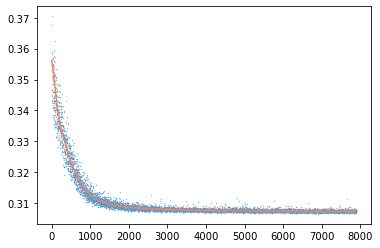

In [62]:

seaborn.scatterplot(x=list(range(len(loss_tracker))),y=loss_tracker,alpha=0.5,s=2)
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
w=300
mvavg=moving_average(np.pad(loss_tracker,int(w/2),mode='edge'),w)
seaborn.lineplot(x=list(range(len(mvavg))),y=mvavg,color='coral')



In [63]:
"""
scgpgmm.dc_batch_encoder.cpu()
seaborn.histplot(scgpgmm.dc_batch_encoder(torch.eye(batch_values.shape[1])).detach().cpu().numpy().flatten()[:10000],bins=100)
plt.show()
scgpgmm.dc_batch_encoder.to(device)
"""

'\nscgpgmm.dc_batch_encoder.cpu()\nseaborn.histplot(scgpgmm.dc_batch_encoder(torch.eye(batch_values.shape[1])).detach().cpu().numpy().flatten()[:10000],bins=100)\nplt.show()\nscgpgmm.dc_batch_encoder.to(device)\n'

/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

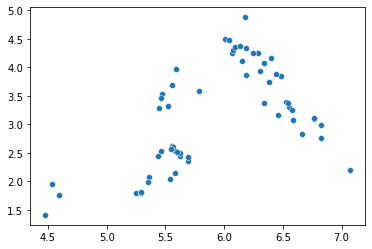

In [64]:
seaborn.scatterplot(pyro.param('l_mu').detach().cpu().flatten(),pyro.param('l_scale').detach().cpu().flatten())

<AxesSubplot:ylabel='Count'>

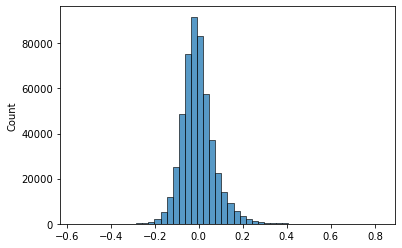

In [65]:
seaborn.histplot(pyro.param('z_decoder_weight').detach().cpu().numpy().flatten(),bins=50)


<AxesSubplot:ylabel='Count'>

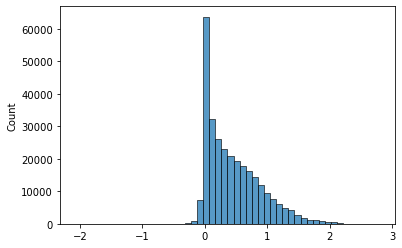

In [66]:
seaborn.histplot(pyro.param('batch_intercept').detach().cpu().numpy().flatten(),bins=50)


<AxesSubplot:ylabel='Count'>

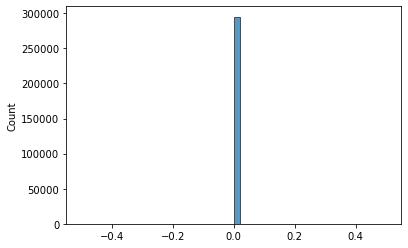

In [67]:
seaborn.histplot(pyro.param('batch_divergence').detach().cpu().numpy().flatten(),bins=50)


<AxesSubplot:ylabel='Count'>

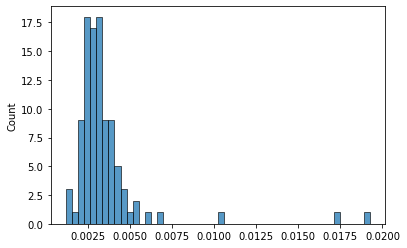

In [68]:
seaborn.histplot(pyro.param('z_decoder_weight').var(1).detach().cpu().numpy().flatten(),bins=50)


<AxesSubplot:ylabel='Percent'>

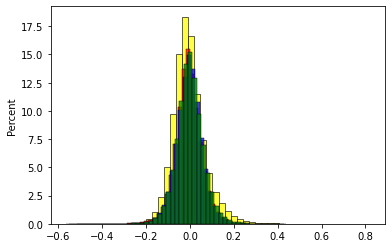

In [69]:
seaborn.histplot(pyro.param('z_decoder_weight').detach().cpu().numpy().flatten(),color='yellow',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[0].cpu().detach().numpy().flatten(),color='red',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[1].cpu().detach().numpy().flatten(),color='blue',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[2].cpu().detach().numpy().flatten(),color='green',bins=50,stat='percent')

In [70]:
print(pyro.param('z_decoder_weight').var())
print(pyro.param('dc_delta_mu').flatten(1,2).var(1))

tensor(0.0057, device='cuda:0', grad_fn=<VarBackward0>)
tensor([0.0036, 0.0036, 0.0038, 0.0049], device='cuda:0',
       grad_fn=<VarBackward0>)


In [71]:
pyro.get_param_store().__setitem__('dc_delta_mu',torch.zeros(scgpgmm.num_species,scgpgmm.latent_dim,scgpgmm.num_genes).to(device))

<AxesSubplot:ylabel='Percent'>

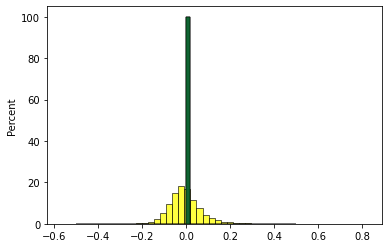

In [72]:
seaborn.histplot(pyro.param('z_decoder_weight').detach().cpu().numpy().flatten(),color='yellow',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[0].cpu().detach().numpy().flatten(),color='red',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[1].cpu().detach().numpy().flatten(),color='blue',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[2].cpu().detach().numpy().flatten(),color='green',bins=50,stat='percent')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:51<00:00,  3.08it/s]


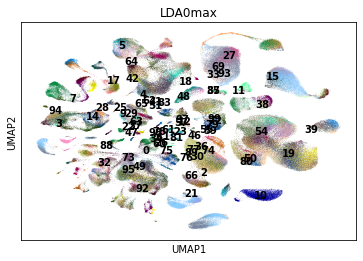

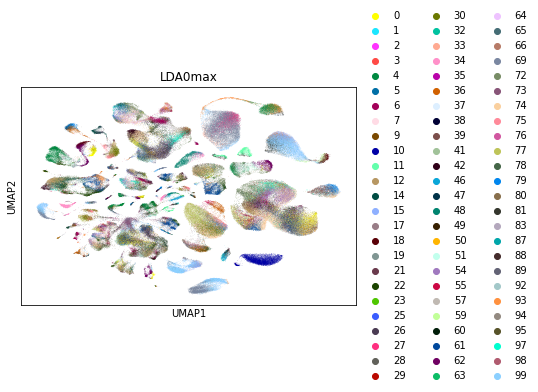

/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


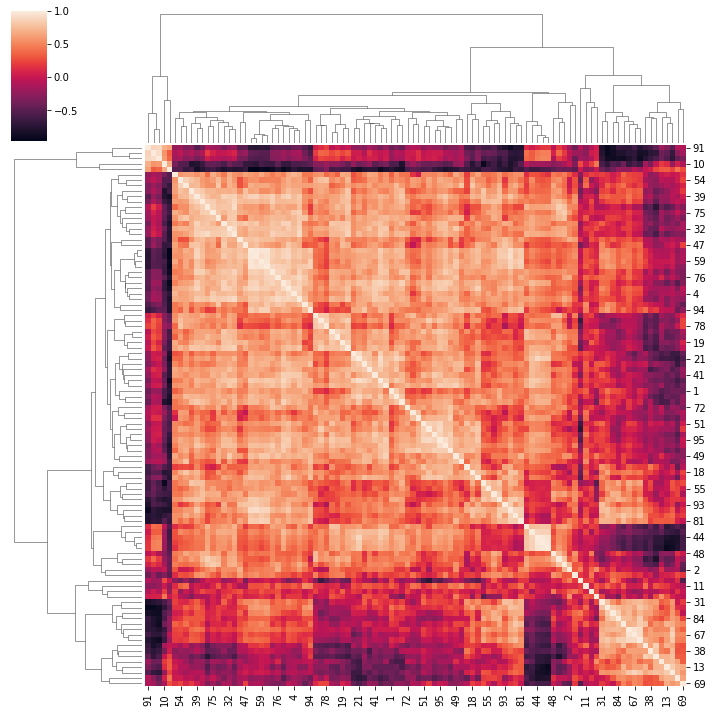

In [73]:
device='cpu'
scgpgmm=scgpgmm.to(device)
avgpool=nn.AvgPool1d(2,stride=1)
# Now that we're done training we'll inspect the latent representations we've learned
import scanpy as sc
adata.obsm["X_umap"]=adata.obsm["X_original_umap"]
# Put the neural networks in evaluation mode (needed because of batch norm)
scgpgmm.eval()
scgpgmm.zl_encoder.eval()
from sklearn import cluster

# Compute latent representation (z_loc) for each cell in the dataset
inputs=[torch.tensor(adata.layers['spliced'].todense()).to(device),species_values]
function=scgpgmm.zl_encoder
num_outs=4
encoded=batch_torch_outputs(inputs,function,num_outs,batch_size=2048,device='cpu')

clusternames=[]
for i in range(scgpgmm.latent_dim):
    clusternames.append(str(i))

adata.obs['LDA0max']=np.array(clusternames)[encoded[0].cpu().detach().numpy().argmax(1)]

sc.pl.umap(adata,color=['LDA0max'],legend_loc="on data",palette=sc.pl.palettes.godsnot_102)
sc.pl.umap(adata,color=['LDA0max'],palette=sc.pl.palettes.godsnot_102)
"""
for i in range(latent_dim):
    adata.obs['test'+str(i)]=torch.softmax(encoded[0],dim=-1)[:,i].cpu().detach().numpy()
sc.pl.umap(adata,color=['test'+str(x) for x in range(latent_dim)],use_raw=False,cmap='Purples')
"""
seaborn.clustermap(np.corrcoef(encoded[0].T.cpu().detach().numpy()))


[[2.1787457e-02 5.0485934e-05 5.5406587e-03 ... 8.9142928e-03
  1.5578374e-03 2.0242786e-02]
 [3.5541636e-04 6.3106301e-05 6.1273691e-05 ... 2.7738101e-10
  2.6235443e-02 5.6513377e-02]
 [3.5797199e-10 3.5797199e-10 3.5797199e-10 ... 3.5797199e-10
  3.5797199e-10 3.5797199e-10]
 ...
 [5.8408598e-03 3.0183371e-03 1.5236172e-02 ... 2.2915026e-02
  3.1201197e-10 1.5984580e-02]
 [1.0206918e-02 3.7666785e-03 1.0224977e-02 ... 6.6203829e-05
  1.4077465e-02 1.4907448e-02]
 [3.3605039e-02 1.9785129e-04 1.9964884e-06 ... 1.8840857e-02
  4.9639493e-05 1.4478928e-02]]


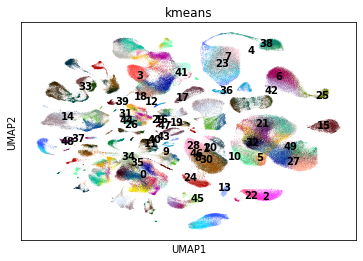

In [74]:
adata.obsm["X_scgpgmm"] =softplus_sum(encoded[0]).data.cpu().numpy()
X=adata.obsm['X_scgpgmm']
kmeans = sklearn.cluster.MiniBatchKMeans(n_clusters=scgpgmm.num_labels,init='k-means++',max_iter=100,reassignment_ratio=0.01,n_init=10,random_state=0).fit(X)
kmeans.labels_
print(kmeans.cluster_centers_)
adata.obs['kmeans']=kmeans.labels_
adata.obs['kmeans']=adata.obs['kmeans'].astype(str)
sc.pl.umap(adata,color=['kmeans'],legend_loc="on data",palette=sc.pl.palettes.godsnot_102)

0.46050368911836403


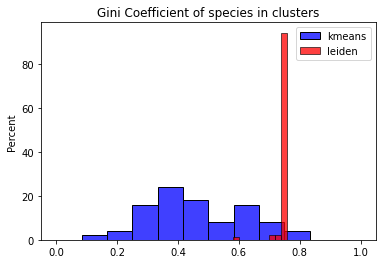

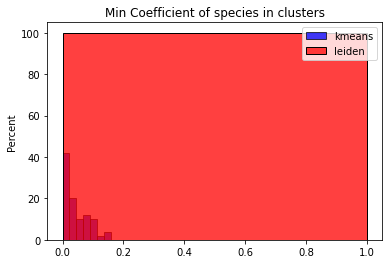

In [75]:
def gini(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

df1=adata.obs.groupby('kmeans')['species'].value_counts(normalize=False).unstack()
seaborn.histplot(df1.apply(func=gini,axis=1),binrange=[0,1],color='blue',label='kmeans', stat="percent")
df2=adata.obs.groupby('leiden')['species'].value_counts(normalize=False).unstack()
seaborn.histplot(df2.apply(func=gini,axis=1),binrange=[0,1],color='red',label='leiden', stat="percent")
plt.title('Gini Coefficient of species in clusters')
plt.legend()
print(df1.apply(func=gini,axis=1).mean())
plt.show()
df1=adata.obs.groupby('kmeans')['species'].value_counts(normalize=True).unstack()
df2=adata.obs.groupby('leiden')['species'].value_counts(normalize=True).unstack()
seaborn.histplot(df1.apply(func=np.min,axis=1),binrange=[0,1],color='blue',label='kmeans', stat="percent")
seaborn.histplot(df2.apply(func=np.min,axis=1),binrange=[0,1],color='red',label='leiden', stat="percent")
plt.title('Min Coefficient of species in clusters')
plt.legend()

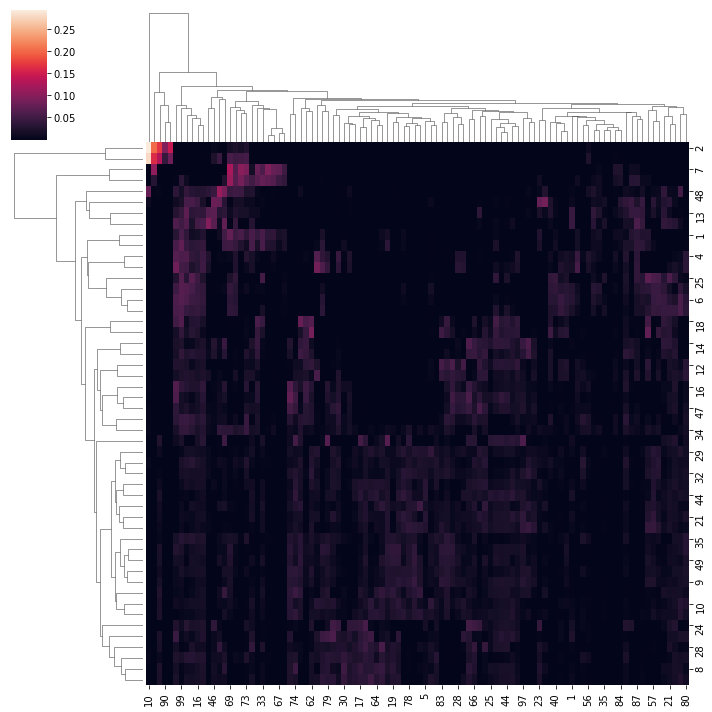

In [76]:
seaborn.clustermap(kmeans.cluster_centers_)
plt.show()


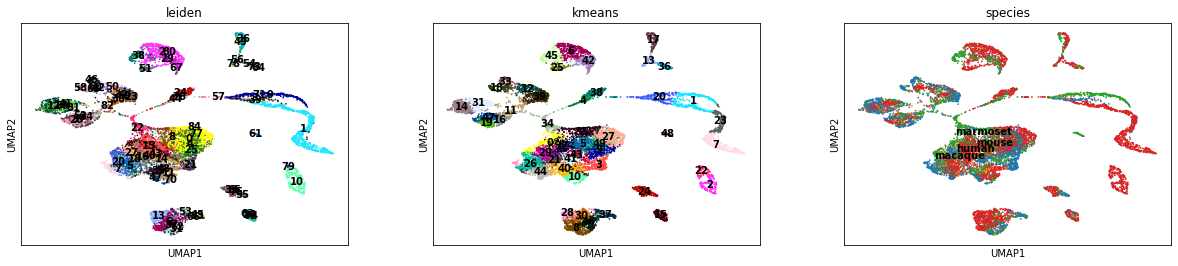

In [77]:
adata.obsm['X_scgpgmm']=softplus_sum(encoded[0]).detach().data.cpu().numpy()
xdata=adata[np.random.choice(adata.obs.index,size=10000,replace=False),:]
sc.pp.neighbors(xdata,n_neighbors=20, use_rep="X_scgpgmm")
sc.tl.umap(xdata)
sc.pl.umap(xdata,color=['leiden','kmeans','species'],use_raw=False,legend_loc='on data')

In [79]:
d=torch.utils.data.TensorDataset(torch.tensor(adata.layers['spliced'].todense()),species_values,batch_values,torch.tensor(list(adata.obs['kmeans'].astype(int))).long())
dataloader = torch.utils.data.DataLoader(d,sampler=sampler, batch_size=batch_size,drop_last=True)

scheduler =pyro.optim.ClippedAdam({'lr':0.002,'lrd':(1-(7e-6))})

# Setup a variational objective for gradient-based learning.
# Note we use TraceEnum_ELBO in order to leverage Pyro's machinery
# for automatic enumeration of the discrete latent variable y.
elbo = pyro.infer.JitTraceEnum_ELBO(num_particles=1,strict_enumeration_warning=False)
#elbo = pyro.infer.Trace_ELBO(num_particles=30)

svi = SVI(scgpgmm.model, scgpgmm.guide, scheduler, elbo)
scgpgmm.train()
scgpgmm.zl_encoder.train()


ZLEncoder(
  (fc): Sequential(
    (0): Linear(in_features=5005, out_features=6000, bias=False)
    (1): Dropout(p=0.05, inplace=False)
    (2): BatchNorm1d(6000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=6000, out_features=3000, bias=False)
    (5): Dropout(p=0.05, inplace=False)
    (6): BatchNorm1d(3000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=3000, out_features=1000, bias=False)
    (9): Dropout(p=0.05, inplace=False)
    (10): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.01)
    (12): Linear(in_features=1000, out_features=202, bias=False)
    (13): Dropout(p=0.05, inplace=False)
    (14): BatchNorm1d(202, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [80]:
num_epochs=2
device='cuda'
scgpgmm = scgpgmm.to(device)
scgpgmm.train()
scgpgmm.zl_encoder.train()
scgpgmm.set_approx(False)
loss_tracker=[]
for epoch in range(num_epochs):
    losses = []
    # Take a gradient step for each mini-batch in the dataset
    count=0
    for x in tqdm.tqdm(dataloader):
        args=[y.to(device) for y in x]
        loss = svi.step(*args)
        losses.append(loss)
        count+=1
        loss_tracker.append(loss)
    # Tell the scheduler we've done one epoch.
    print("[Epoch %02d]  Loss: %.5f" % (epoch, np.mean(losses)))
allDone()
print("Finished training!")

  0%|                                                                                                                                      | 0/10197 [00:00<?, ?it/s]/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/util.py:288: UserWarning: Found non-auxiliary vars in guide but not model, consider marking these infer={'is_auxiliary': True}:
{'y1'}
  warnings.warn(
/tmp/ipykernel_3887225/4218598804.py:134: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if s.shape[1] !=1:
 34%|█████████████████████████████████████████▌                                                                                 | 3449/10197 [05:50<11:25,  9.85it/s]


KeyboardInterrupt: 

<AxesSubplot:>

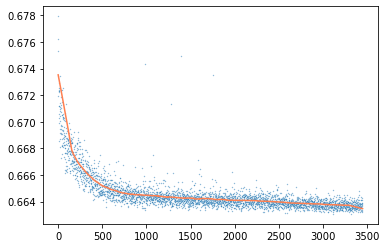

In [81]:

seaborn.scatterplot(x=list(range(len(loss_tracker))),y=loss_tracker,alpha=0.5,s=2)
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
w=300
mvavg=moving_average(np.pad(loss_tracker,int(w/2),mode='edge'),w)
seaborn.lineplot(x=list(range(len(mvavg))),y=mvavg,color='coral')



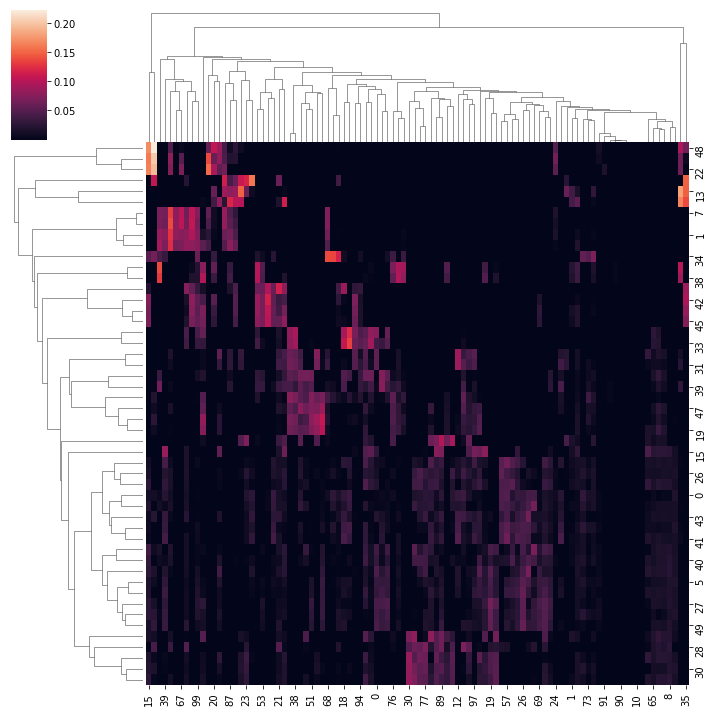

In [82]:
seaborn.clustermap(softplus_sum(pyro.param('locs')).cpu().detach().numpy())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:53<00:00,  2.99it/s]


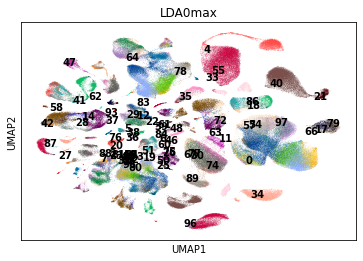

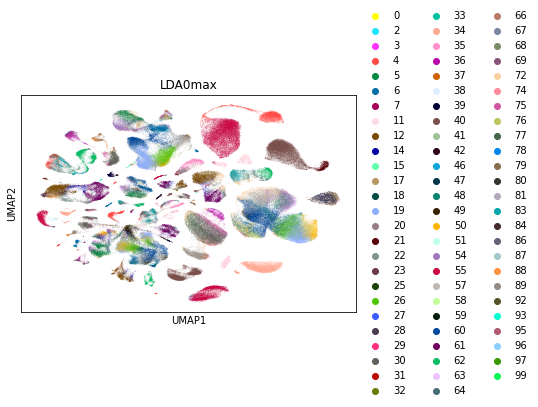

/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


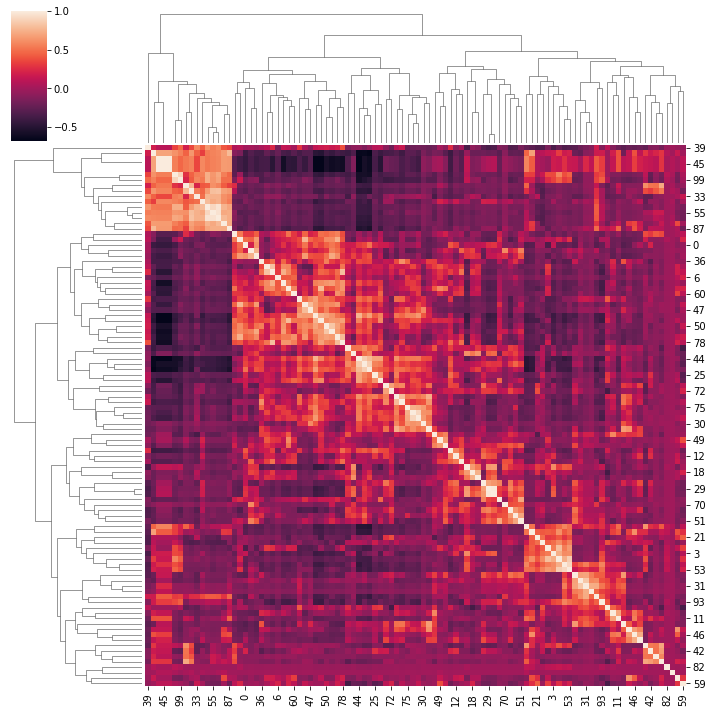

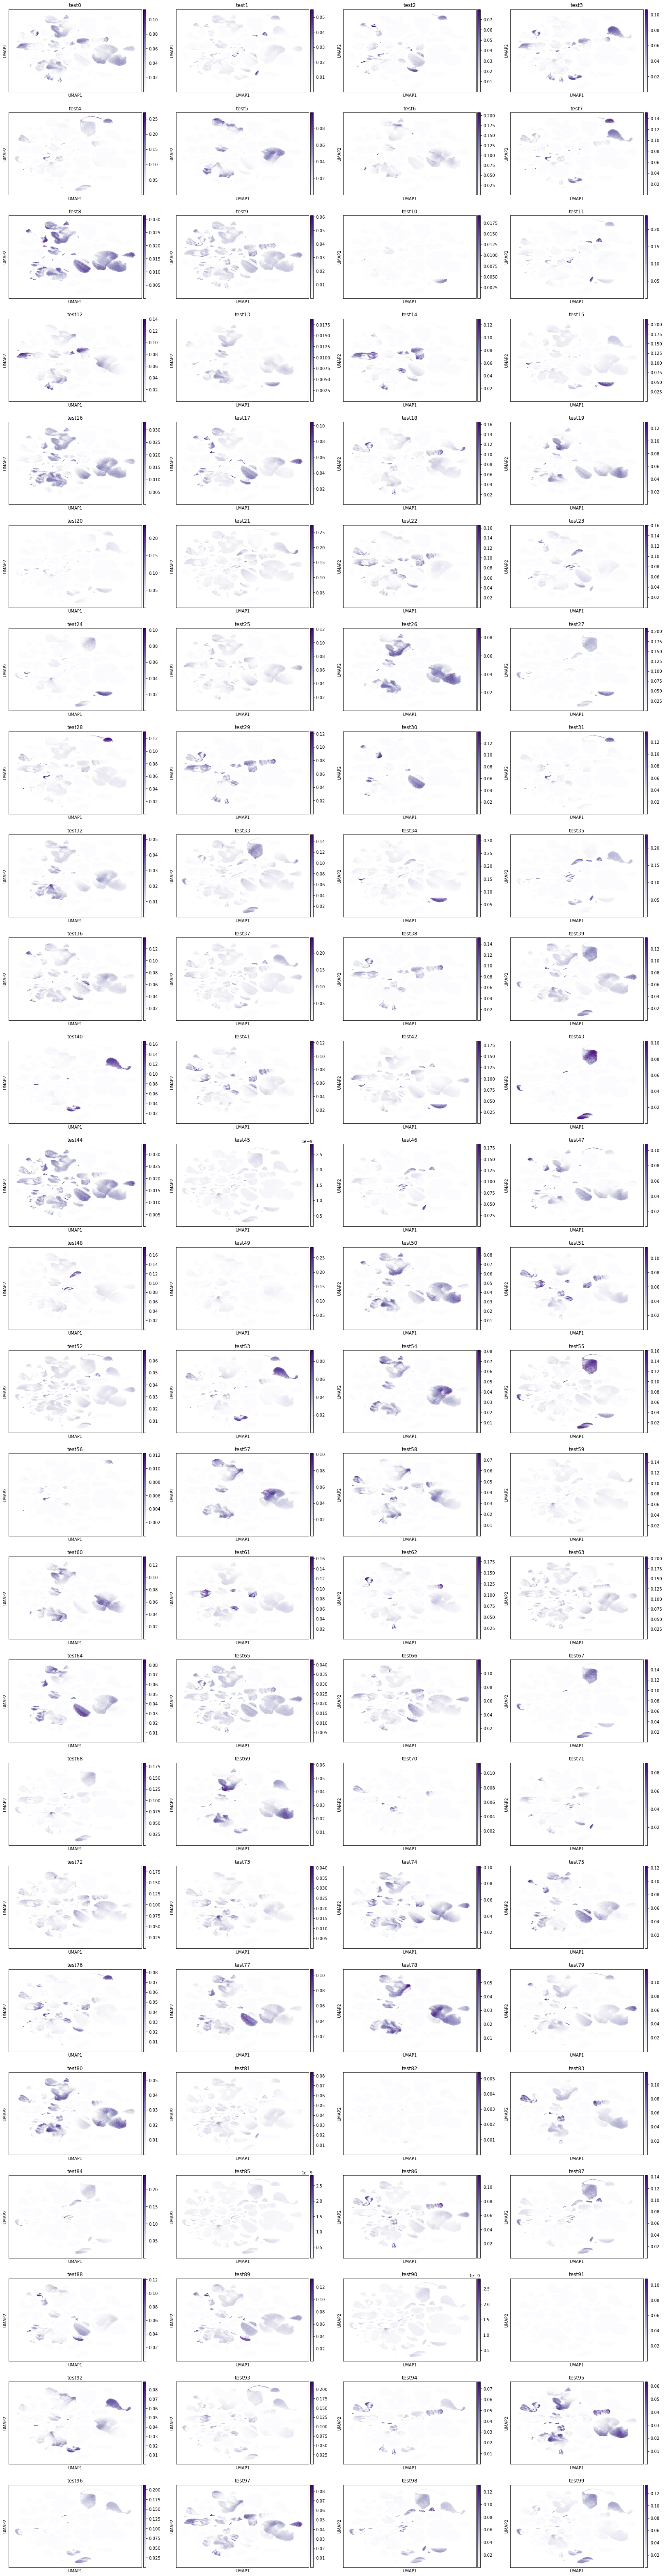

In [83]:
device='cpu'
scgpgmm=scgpgmm.to(device)
avgpool=nn.AvgPool1d(2,stride=1)
# Now that we're done training we'll inspect the latent representations we've learned
import scanpy as sc
adata.obsm["X_umap"]=adata.obsm["X_original_umap"]
# Put the neural networks in evaluation mode (needed because of batch norm)
scgpgmm.eval()
scgpgmm.zl_encoder.eval()
from sklearn import cluster

# Compute latent representation (z_loc) for each cell in the dataset
inputs=[torch.tensor(adata.layers['spliced'].todense()).to(device),species_values]
function=scgpgmm.zl_encoder
num_outs=4
encoded=batch_torch_outputs(inputs,function,num_outs,batch_size=2048,device='cpu')

clusternames=[]
for i in range(scgpgmm.latent_dim):
    clusternames.append(str(i))

adata.obs['LDA0max']=np.array(clusternames)[encoded[0].cpu().detach().numpy().argmax(1)]

sc.pl.umap(adata,color=['LDA0max'],legend_loc="on data",palette=sc.pl.palettes.godsnot_102)
sc.pl.umap(adata,color=['LDA0max'],palette=sc.pl.palettes.godsnot_102)
seaborn.clustermap(np.corrcoef(softplus_sum(encoded[0]).T.cpu().detach().numpy()))

for i in range(latent_dim):
    adata.obs['test'+str(i)]=softplus_sum(encoded[0])[:,i].cpu().detach().numpy()
adata.obs=adata.obs.copy()
sc.pl.umap(adata,color=['test'+str(x) for x in range(latent_dim)],use_raw=False,cmap='Purples')



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:17<00:00,  9.25it/s]


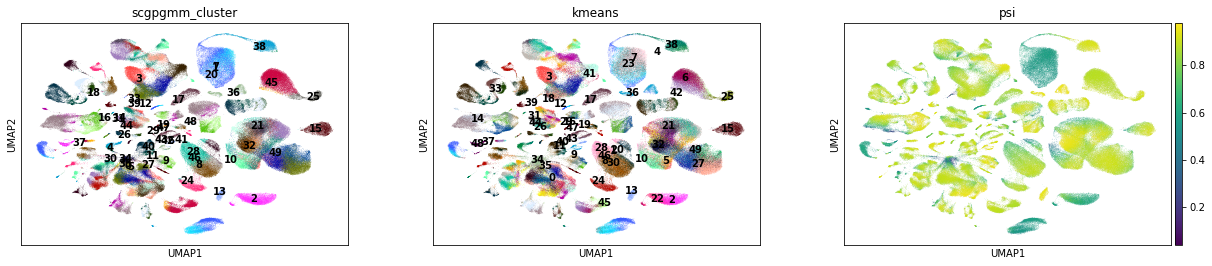

<AxesSubplot:xlabel='psi', ylabel='Count'>

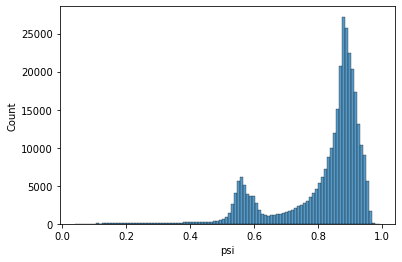

In [84]:
classouts=batch_torch_outputs([softplus_sum(encoded[0])],scgpgmm.classifier,3,batch_size=2048,device=device)
y_logits=classouts[0]
y1_probs = softmax(y_logits, dim=-1)
adata.obs['scgpgmm_cluster']=y1_probs.argmax(1).cpu().numpy()
adata.obs['psi']=torch.sigmoid(classouts[1]).detach().cpu().numpy()
adata.obs['scgpgmm_cluster']=adata.obs['scgpgmm_cluster'].astype(str)
sc.pl.umap(adata,color=['scgpgmm_cluster','kmeans','psi'],use_raw=False,legend_loc='on data',palette=sc.pl.palettes.godsnot_102)
seaborn.histplot(y1_probs.cpu().detach().numpy().max(0),legend=False,bins=100)
seaborn.histplot(adata.obs['psi'],legend=False,bins=100)


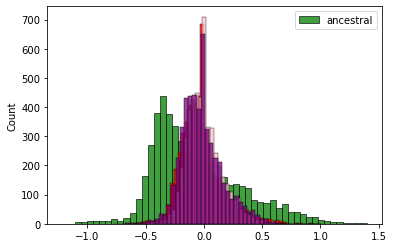

In [85]:
seaborn.histplot(pyro.param('locs').cpu().detach().numpy().flatten(),color="green",label='ancestral',bins=50)
seaborn.histplot(pyro.param('loc_divergence')[:,:,0].cpu().detach().numpy().flatten(),color="red",bins=50)
seaborn.histplot(pyro.param('loc_divergence')[:,:,1].cpu().detach().numpy().flatten(),color="pink",bins=50)
seaborn.histplot(pyro.param('loc_divergence')[:,:,2].cpu().detach().numpy().flatten(),color="purple",bins=50)
plt.legend()

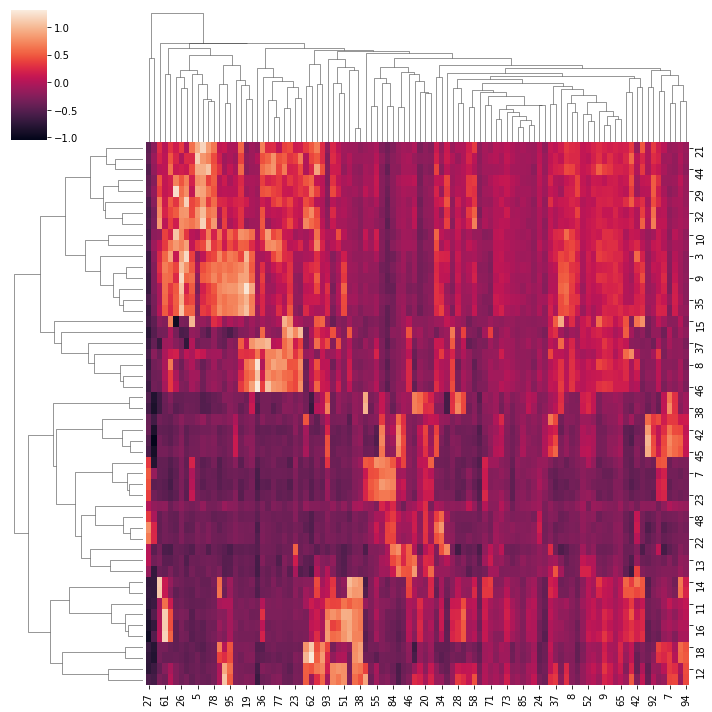

In [86]:
seaborn.clustermap(pyro.param('locs_dynam').cpu().detach().numpy())

<AxesSubplot:ylabel='Percent'>

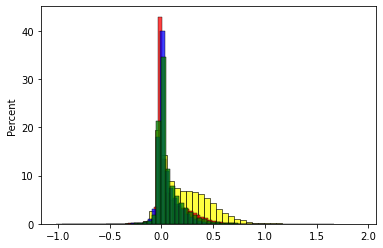

In [87]:
seaborn.histplot(pyro.param('cluster_intercept').cpu().detach().numpy().flatten(),color='yellow',bins=50,stat='percent')
seaborn.histplot(pyro.param('de_delta_mu')[0].cpu().detach().numpy().flatten(),color='red',bins=50,stat='percent')
seaborn.histplot(pyro.param('de_delta_mu')[1].cpu().detach().numpy().flatten(),color='blue',bins=50,stat='percent')
seaborn.histplot(pyro.param('de_delta_mu')[2].cpu().detach().numpy().flatten(),color='green',bins=50,stat='percent')


In [88]:
(pyro.param('dc_delta_mu')>0.1).sum()

tensor(70720, device='cuda:0')

In [89]:
(pyro.param('de_delta_mu')>0.1).sum()

tensor(262560, device='cuda:0')

<AxesSubplot:ylabel='Percent'>

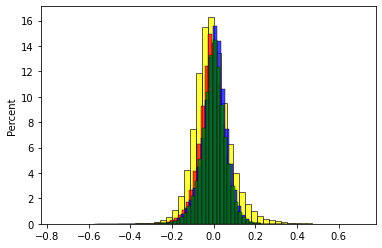

In [90]:
seaborn.histplot(pyro.param('z_decoder_weight').detach().cpu().numpy().flatten(),color='yellow',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[0].cpu().detach().numpy().flatten(),color='red',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[1].cpu().detach().numpy().flatten(),color='blue',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[2].cpu().detach().numpy().flatten(),color='green',bins=50,stat='percent')

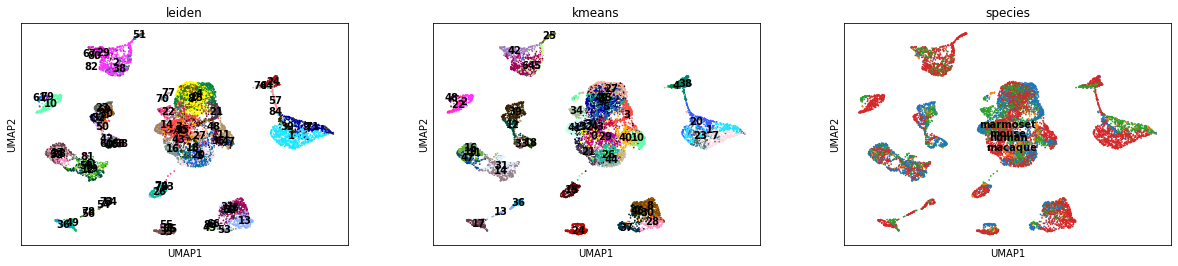

In [91]:
adata.obsm['X_scgpgmm']=softplus_sum(encoded[0]).detach().data.cpu().numpy()
xdata=adata[np.random.choice(adata.obs.index,size=10000,replace=False),:]
sc.pp.neighbors(xdata,n_neighbors=20, use_rep="X_scgpgmm")
sc.tl.umap(xdata)
sc.pl.umap(xdata,color=['leiden','kmeans','species'],use_raw=False,legend_loc='on data')

In [58]:

device='cuda'
scgpgmm.train()
scgpgmm.zl_encoder.train()
num_epochs=20

d=torch.utils.data.TensorDataset(torch.tensor(adata.layers['spliced'].todense()),species_values,batch_values)
dataloader = torch.utils.data.DataLoader(d,sampler=sampler, batch_size=batch_size,drop_last=True)

scgpgmm = scgpgmm.to(device)
scgpgmm.set_approx(False)
loss_tracker=[]
for epoch in range(num_epochs):
    losses = []
    # Take a gradient step for each mini-batch in the dataset
    count=0
    for x in tqdm.tqdm(dataloader):
        args=[y.to(device) for y in x]
        loss = svi.step(*args)
        losses.append(loss)
        count+=1
        loss_tracker.append(loss)
    # Tell the scheduler we've done one epoch.
    print("[Epoch %02d]  Loss: %.5f" % (epoch, np.mean(losses)))
allDone()
print("Finished training!")


  0%|                                                                                                                                      | 0/10197 [00:00<?, ?it/s]/tmp/ipykernel_3887225/962773581.py:132: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if s.shape[1] !=1:
 73%|██████████████████████████████████████████████████████████████████████████████████████████▎                                | 7486/10197 [09:56<03:35, 12.56it/s]


RuntimeError: The following operation failed in the TorchScript interpreter.
Traceback of TorchScript (most recent call last):
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/ops/special.py(32): safe_log
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/ops/einsum/torch_log.py(40): einsum
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/ops/einsum/torch_marginal.py(53): einsum
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/opt_einsum/contract.py(342): _einsum
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/opt_einsum/sharing.py(100): _memoize
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/opt_einsum/sharing.py(162): cached_einsum
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/opt_einsum/contract.py(564): _core_contract
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/opt_einsum/contract.py(693): _contract
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/opt_einsum/contract.py(750): __call__
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/ops/einsum/__init__.py(43): contract
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/ops/rings.py(197): sumproduct
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/infer/util.py(286): compute_expectation
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/infer/traceenum_elbo.py(201): _compute_dice_elbo
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/infer/traceenum_elbo.py(553): differentiable_loss
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/poutine/messenger.py(12): _context_wrap
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/ops/jit.py(90): compiled
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/torch/jit/_trace.py(769): trace
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/ops/jit.py(78): __call__
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/infer/traceenum_elbo.py(545): differentiable_loss
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/infer/traceenum_elbo.py(564): loss_and_grads
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/infer/svi.py(145): step
/tmp/ipykernel_3887225/328861679.py(16): <cell line: 12>
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3358): run_code
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3269): run_ast_nodes
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3073): run_cell_async
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(2876): _run_cell
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(2854): run_cell
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/zmqshell.py(532): run_cell
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/ipkernel.py(329): do_execute
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelbase.py(644): execute_request
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelbase.py(344): dispatch_shell
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelbase.py(457): process_one
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelbase.py(471): dispatch_queue
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/asyncio/events.py(80): _run
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/asyncio/base_events.py(1845): _run_once
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/asyncio/base_events.py(589): run_forever
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/tornado/platform/asyncio.py(195): start
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelapp.py(668): start
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/traitlets/config/application.py(844): launch_instance
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel_launcher.py(12): <module>
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/runpy.py(75): _run_code
/home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/runpy.py(191): _run_module_as_main
RuntimeError: KeyboardInterrupt: 

At:
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/ops/special.py(16): forward
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/ops/jit.py(120): __call__
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/infer/traceenum_elbo.py(561): differentiable_loss
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/infer/traceenum_elbo.py(564): loss_and_grads
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/pyro/infer/svi.py(145): step
  /tmp/ipykernel_3887225/328861679.py(18): <cell line: 12>
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3361): run_code
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3301): run_ast_nodes
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3098): run_cell_async
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(2900): _run_cell
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/IPython/core/interactiveshell.py(2854): run_cell
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/zmqshell.py(532): run_cell
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/ipkernel.py(360): do_execute
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelbase.py(662): execute_request
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelbase.py(367): dispatch_shell
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelbase.py(460): process_one
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelbase.py(471): dispatch_queue
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/asyncio/events.py(80): _run
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/asyncio/base_events.py(1881): _run_once
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/asyncio/base_events.py(595): run_forever
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/tornado/platform/asyncio.py(199): start
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel/kernelapp.py(677): start
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/traitlets/config/application.py(846): launch_instance
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/site-packages/ipykernel_launcher.py(16): <module>
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/runpy.py(86): _run_code
  /home/mtschmitz/utils/miniconda3/envs/pyro/lib/python3.10/runpy.py(196): _run_module_as_main



In [ ]:

seaborn.scatterplot(x=list(range(len(loss_tracker))),y=loss_tracker,alpha=0.5,s=2)
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
w=300
mvavg=moving_average(np.pad(loss_tracker,int(w/2),mode='edge'),w)
seaborn.lineplot(x=list(range(len(mvavg))),y=mvavg,color='coral')


In [ ]:
seaborn.scatterplot(pyro.param('l_mu').detach().cpu().flatten(),pyro.param('l_scale').detach().cpu().flatten())

In [ ]:
seaborn.clustermap(pyro.param('locs').cpu().detach().numpy())

In [ ]:
seaborn.clustermap(pyro.param('scales').cpu().detach().numpy())

In [ ]:
seaborn.histplot(pyro.param('locs').cpu().detach().numpy().flatten(),color="green",label='ancestral',bins=50)
seaborn.histplot(pyro.param('loc_divergence')[:,:,0].cpu().detach().numpy().flatten(),color="red",bins=50)
seaborn.histplot(pyro.param('loc_divergence')[:,:,1].cpu().detach().numpy().flatten(),color="pink",bins=50)
seaborn.histplot(pyro.param('loc_divergence')[:,:,2].cpu().detach().numpy().flatten(),color="purple",bins=50)
plt.legend()

In [ ]:
seaborn.clustermap(pyro.param('locs_dynam').cpu().detach().numpy())

In [ ]:
seaborn.histplot(pyro.param('z_decoder_weight').detach().cpu().numpy().flatten(),bins=50)


In [ ]:
seaborn.histplot(pyro.param('z_decoder_weight').var(1).detach().cpu().numpy().flatten(),bins=50)


In [ ]:
seaborn.histplot(pyro.param('cluster_intercept').cpu().detach().numpy().flatten(),color='yellow',bins=50,stat='percent')
seaborn.histplot(pyro.param('de_delta_mu')[0].cpu().detach().numpy().flatten(),color='red',bins=50,stat='percent')
seaborn.histplot(pyro.param('de_delta_mu')[1].cpu().detach().numpy().flatten(),color='blue',bins=50,stat='percent')
seaborn.histplot(pyro.param('de_delta_mu')[2].cpu().detach().numpy().flatten(),color='green',bins=50,stat='percent')


In [ ]:
(pyro.param('dc_delta_mu')>0.1).sum()

In [ ]:
(pyro.param('de_delta_mu')>0.1).sum()

In [ ]:
seaborn.histplot(pyro.param('z_decoder_weight').detach().cpu().numpy().flatten(),color='yellow',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[0].cpu().detach().numpy().flatten(),color='red',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[1].cpu().detach().numpy().flatten(),color='blue',bins=50,stat='percent')
seaborn.histplot(pyro.param('dc_delta_mu')[2].cpu().detach().numpy().flatten(),color='green',bins=50,stat='percent')

In [ ]:
print(pyro.param('z_decoder_weight').var())
print(pyro.param('dc_delta_mu').flatten(1,2).var(1))

In [ ]:
device='cpu'
scgpgmm=scgpgmm.to(device)
avgpool=nn.AvgPool1d(2,stride=1)
# Now that we're done training we'll inspect the latent representations we've learned
import scanpy as sc
adata.obsm["X_umap"]=adata.obsm["X_original_umap"]
# Put the neural networks in evaluation mode (needed because of batch norm)
scgpgmm.eval()
scgpgmm.zl_encoder.eval()
from sklearn import cluster

# Compute latent representation (z_loc) for each cell in the dataset
inputs=[torch.tensor(adata.layers['spliced'].todense()).to(device),species_values]
function=scgpgmm.zl_encoder
num_outs=4
encoded=batch_torch_outputs(inputs,function,num_outs,batch_size=2048,device='cpu')

clusternames=[]
for i in range(scgpgmm.latent_dim):
    clusternames.append(str(i))

adata.obs['LDA0max']=np.array(clusternames)[encoded[0].cpu().detach().numpy().argmax(1)]

sc.pl.umap(adata,color=['LDA0max'],palette=sc.pl.palettes.godsnot_102)
sc.pl.umap(adata,color=['LDA0max'],palette=sc.pl.palettes.godsnot_102,legend_loc='on data')

seaborn.clustermap(np.corrcoef(encoded[0].T.cpu().detach().numpy()))

"""
for i in range(latent_dim):
    adata.obs['test'+str(i)]=torch.softmax(encoded[0],dim=-1)[:,i].cpu().detach().numpy()
adata.obs=adata.obs.copy()
sc.pl.umap(adata,color=['test'+str(x) for x in range(latent_dim)],use_raw=False,cmap='Purples')
"""

In [ ]:
seaborn.histplot(pyro.param('scales').cpu().detach().numpy().flatten(),stat='percent')
plt.show()
seaborn.histplot(encoded[1].detach().cpu().numpy().flatten(),stat='percent')

In [ ]:
seaborn.histplot(pyro.param('z_decoder_weight').abs().max(1)[0].detach().cpu().numpy().flatten(),color='yellow',bins=50,stat='percent')


In [ ]:
classouts=batch_torch_outputs([softplus_sum(encoded[0])],scgpgmm.classifier,3,batch_size=2048,device=device)
y_logits=classouts[0]
y1_probs = softmax(y_logits, dim=-1)
adata.obs['scgpgmm_cluster']=y1_probs.argmax(1).cpu().numpy()
adata.obs['psi']=torch.sigmoid(classouts[1]).detach().cpu().numpy()
adata.obs['scgpgmm_cluster']=adata.obs['scgpgmm_cluster'].astype(str)
sc.pl.umap(adata,color=['scgpgmm_cluster','kmeans','psi'],use_raw=False,legend_loc='on data',palette=sc.pl.palettes.godsnot_102)
seaborn.histplot(y1_probs.cpu().detach().numpy().max(0),legend=False,bins=100)
seaborn.histplot(adata.obs['psi'],legend=False,bins=100)


In [ ]:
adata.obs['scgpgmm_cluster'].value_counts()[adata.obs['scgpgmm_cluster'].value_counts()>100]

In [ ]:
df1=adata.obs.groupby('scgpgmm_cluster')['species'].value_counts(normalize=False).unstack()
df1.plot.bar(stacked=True, width=0.8,figsize=(24,8))

In [ ]:
def gini(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

df1=adata.obs.groupby('scgpgmm_cluster')['species'].value_counts(normalize=False).unstack()
seaborn.histplot(df1.apply(func=gini,axis=1),binrange=[0,1],color='blue',label='scgpgmm', stat="percent")
df2=adata.obs.groupby('leiden')['species'].value_counts(normalize=False).unstack()
seaborn.histplot(df2.apply(func=gini,axis=1),binrange=[0,1],color='red',label='leiden', stat="percent")
plt.title('Gini Coefficient of species in clusters')
plt.legend()
print(df1.apply(func=gini,axis=1).mean())
plt.show()
df1=adata.obs.groupby('scgpgmm_cluster')['species'].value_counts(normalize=True).unstack()
df2=adata.obs.groupby('leiden')['species'].value_counts(normalize=True).unstack()
seaborn.histplot(df1.apply(func=np.min,axis=1),binrange=[0,1],color='blue',label='scgpgmm', stat="percent")
seaborn.histplot(df2.apply(func=np.min,axis=1),binrange=[0,1],color='red',label='leiden', stat="percent")
plt.title('Min Coefficient of species in clusters')
plt.legend()

In [ ]:
adata.obs.groupby('scgpgmm_cluster')['psi'].std()

In [ ]:
adata.obsm['X_scgpgmm']=softplus_sum(encoded[0]).detach().data.cpu().numpy()
xdata=adata[np.random.choice(adata.obs.index,size=10000,replace=False),:]
sc.pp.neighbors(xdata,n_neighbors=20, use_rep="X_scgpgmm")
sc.tl.umap(xdata)
sc.pl.umap(xdata,color=['leiden','kmeans','species'],use_raw=False,legend_loc='on data')

In [ ]:
adata.obsm['X_scgpgmm']=(softplus_sum(encoded[0]-pyro.param('loc_divergence')[classouts[0].argmax(1),:,species_values.argmax(1)].detach().data.cpu())).detach().data.cpu().numpy()
xdata=adata[np.random.choice(adata.obs.index,size=10000,replace=False),:]
sc.pp.neighbors(xdata,n_neighbors=20, use_rep="X_scgpgmm")
sc.tl.umap(xdata)
sc.pl.umap(xdata,color=['leiden','scgpgmm_cluster','kmeans','species','psi'],use_raw=False,legend_loc='on data')

In [ ]:
sc.pp.neighbors(adata,n_neighbors=45, use_rep="X_scgpgmm")
sc.tl.umap(adata)
sc.tl.leiden(adata,key_added='new_leiden')
sc.pl.umap(adata,color=['leiden','new_leiden','scgpgmm_cluster','kmeans'],legend_loc='on data',use_raw=False)
sc.pl.umap(adata,color=['region','species',],use_raw=False)

In [ ]:
for i in range(latent_dim):
    adata.obs['test'+str(i)]=torch.softmax(encoded[0],dim=-1)[:,i].cpu().detach().numpy()
adata.obs=adata.obs.copy()
sc.pl.umap(adata,color=['test'+str(x) for x in range(latent_dim)],use_raw=False,cmap='Purples')

In [ ]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata,max_value=10)


In [ ]:
sc.tl.dendrogram(adata,groupby='scgpgmm_cluster',use_rep='X_scgpgmm')
sc.pl.umap(adata,color=['DLX2','NKX2-1','PROX1','MEIS2','NKX2-1','CRABP1','TSHZ1','FOXG1'],cmap='Purples',use_raw=False)
sc.pl.dotplot(adata,var_names=['DLX2','NKX2-1','PROX1','MEIS2','NKX2-1','CRABP1','TSHZ1','FOXG1'],groupby='scgpgmm_cluster',standard_scale='var',dendrogram=True,cmap='coolwarm',use_raw=False)

In [ ]:
adata.obs.index=adata.obs.index.str.replace('-[0-9]+$','',regex=True)
#adata.obs.index=adata.obs.index.str.replace('_kOut+$','',regex=True)
adata.obs['supervised_name']='nan'
supercell=pd.read_csv('/home/mtschmitz/MouseSupervisednames4PreserveCompoundname.txt')
supercell.index=supercell.index.astype(str)
supercell=supercell.loc[supercell['supervised_name']!='nan',:]
supercell.full_cellname=supercell.full_cellname.str.replace('-[0-9]+$','',regex=True)
ind=adata.obs.index[adata.obs['full_cellname'].isin(supercell['full_cellname'])]
supercell.index=supercell['full_cellname']

supercell=supercell.loc[ind,:]
adata.obs.loc[ind,'supervised_name']=supercell['supervised_name']
supercell=pd.read_csv('/home/mtschmitz/MacaqueGEsupervisednamesHippo4.txt')
supercell=supercell.loc[supercell['supervised_name']!='nan',:]
supercell['supervised_name']=supercell['supervised_name'].str.replace('Cortical\ ','')
ind=adata.obs.index[adata.obs['full_cellname'].isin(supercell['full_cellname'])]
supercell.index=supercell['full_cellname']
supercell=supercell.loc[ind,:]
adata.obs.loc[ind,'supervised_name']=supercell['supervised_name']

In [ ]:
sc.pl.umap(adata[adata.obs.supervised_name!='nan',:],color=['species','supervised_name','scgpgmm_cluster','region','batch_name','timepoint'])

In [ ]:
sc.pl.umap(adata,color=['region','leiden','scgpgmm_cluster','species','supervised_name'],legend_loc='on data',use_raw=False)

In [ ]:
exp_component=(pyro.param('locs')@pyro.param('z_decoder_weight')).detach().cpu().numpy()
dc_component=((pyro.param('locs')@pyro.param('dc_delta_mu')).detach().cpu().numpy())
dm_component=((pyro.param('loc_divergence').permute([2,0,1])@pyro.param('z_decoder_weight')).detach().cpu().numpy())
de_component=pyro.param('de_delta_mu').detach().cpu().numpy()

In [ ]:
seaborn.histplot((dm_component).flatten(),bins=100,color='g')
seaborn.histplot((dc_component).flatten(),bins=100,color='b')
seaborn.histplot((de_component).flatten(),bins=100,color='r')


In [ ]:
seaborn.scatterplot(x=dc_component.flatten(),y=de_component.flatten(),alpha=0.005)
seaborn.kdeplot(x=dc_component.flatten()[0:10000],y=de_component.flatten()[0:10000],color='black',thresh=0.001)

In [ ]:
seaborn.scatterplot(x=dm_component.flatten(),y=de_component.flatten(),alpha=0.005)
seaborn.kdeplot(x=dm_component.flatten()[0:10000],y=de_component.flatten()[0:10000],color='black',thresh=0.001)

In [ ]:
species_mat=[]
for s in adata.obs['species'].cat.categories:
    cluster_mat=[]
    for c in sorted(range(pyro.param('de_delta_mu').shape[1])):
        print(c)
        species_bool=adata.obs['species']==s
        cluster_bool=adata.obs['scgpgmm_cluster']==str(c)
        if sum(species_bool&cluster_bool)==0:
            cluster_mat.append(np.zeros([adata.shape[1],]))
        else:
            cluster_mat.append(adata[species_bool&cluster_bool,:].X.mean(0))
    species_mat.append(np.stack(cluster_mat,axis=0))
cluster_means=np.array(species_mat).squeeze()

In [ ]:
seaborn.regplot(x=cluster_means.mean(0).flatten(),y=exp_component.flatten(),scatter_kws={'alpha':0.01},line_kws={'color':'black'})
plt.xlabel('actual cluster mean expression')
plt.ylabel('modeled cluster mean expression')

In [ ]:
seaborn.regplot(x=(cluster_means-cluster_means.mean(0)).flatten(),y=de_component.flatten(),scatter_kws={'alpha':0.01},line_kws={'color':'black'})
plt.xlabel('actual species mean expression - mean')
plt.ylabel('modeled species differential expression')


In [ ]:
seaborn.regplot(x=cluster_means[0].flatten(),y=cluster_means[1].flatten(),scatter_kws={'alpha':0.01},line_kws={'color':'black'})
plt.xlabel('human')
plt.ylabel('macaque')


In [ ]:
seaborn.scatterplot(x=cluster_means.flatten(),y=de_component.flatten(),alpha=0.005)

In [ ]:
random_data=np.random.choice(list(range(cluster_means.flatten().size)),size=20000)
seaborn.kdeplot(x=(cluster_means-cluster_means.mean(0)).flatten()[random_data],y=de_component.flatten()[random_data],color='black')

In [ ]:
de=pyro.param('de_delta_mu').detach().cpu().numpy()
#de=(((pyro.param('de_delta_mu')-scgpgmm.species_bn.running_mean)/(scgpgmm.species_bn.running_var**0.5+scgpgmm.species_bn.eps))*scgpgmm.species_bn.weight+scgpgmm.species_bn.bias).cpu().detach().numpy()
de_dfs=[]
for s in range(de.shape[0]):
    species_de=[]
    species_de_label=[]
    marker_coefs=[]
    marker_coefs_name=[]
    for t in range(de.shape[1]):
        species_de.append(adata.var.index[de[s,t,:].argsort()])
        species_de.append(de[s,t,de[s,t,:].argsort()])
        species_de_label.append(str(t)+'_'+'name')
        species_de_label.append(str(t)+'_'+'coef')
    pd.DataFrame(species_de,index=species_de_label).T.to_csv(os.path.join('/home/mtschmitz/coefs','DE_coefs_'+adata.obs.species.cat.categories[s]+'.csv'))
    de_dfs.append(pd.DataFrame(species_de,index=species_de_label).T)

In [ ]:
for c in de_dfs[0].columns[de_dfs[0].columns.str.contains('name')]:
    genes=de_dfs[0][c][-3:]
    print(c.replace('_name',''))
    try:
        sc.pl.violin(adata[adata.obs['scgpgmm_cluster']==c.replace('_name',''),:],
                 groupby='species',keys=genes,use_raw=False)
    except:
        continue

In [ ]:
for c in de_dfs[0].columns[de_dfs[0].columns.str.contains('name')]:
    genes=de_dfs[0][c][:3]
    print(c.replace('_name',''))
    try:
        sc.pl.violin(adata[adata.obs['scgpgmm_cluster']==c.replace('_name',''),:],
                 groupby='species',keys=genes,use_raw=False)
    except:
        continue